In [1]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import os
# Ganti dengan path lengkap file CSV Anda
hadits_path = os.path.join(os.getcwd(), 'Al-Hadits ~ Bahasa Indonesia.csv')
quran_path = os.path.join(os.getcwd(), 'Al-Quran ~ Bahasa Indonesia.csv')
fatwa_path = os.path.join(os.getcwd(), 'Fatwa ~ Bahasa Indonesia.csv')

# Membaca file CSV ke dalam DataFrame
df_hadits = pd.read_csv(hadits_path)
df_quran = pd.read_csv(quran_path)
df_fatwa = pd.read_csv(fatwa_path)

In [4]:
df_hadits.head()

Riwayat  Nomor Hadits                                        Bahasa Arab  \
0  Abu Daud             1  حَدَّثَنَا عَبْدُ اللَّهِ بْنُ مَسْلَمَةَ بْنِ...   
1  Abu Daud             2  حَدَّثَنَا مُسَدَّدُ بْنُ مُسَرْهَدٍ حَدَّثَنَ...   
2  Abu Daud             3  حَدَّثَنَا مُوسَى بْنُ إِسْمَعِيلَ حَدَّثَنَا ...   
3  Abu Daud             4  حَدَّثَنَا مُسَدَّدُ بْنُ مُسَرْهَدٍ حَدَّثَنَ...   
4  Abu Daud             5  حَدَّثَنَا عَمْرُو بْنُ مَرْزُوقٍ أَخْبَرَنَا ...   

                                Terjemahan Indonesia            Timestamp  
0  Telah menceritakan kepada kami [Abdullah bin M...  10/23/2024 07:00:00  
1  Telah menceritakan kepada kami [Musaddad bin M...  10/23/2024 07:00:19  
2  Telah menceritakan kepada kami [Musa bin Isma'...  10/23/2024 07:00:39  
3  Telah menceritakan kepada kami [Musaddad bin M...  10/23/2024 07:00:59  
4  Telah menceritakan kepada kami [Amru bin Marzu...  10/23/2024 07:01:19

In [5]:
df_quran.head()

Surah  Ayat ke-                                 Bahasa Arab  \
0  Al-Fatihah         1      بِسْمِ اللّٰهِ الرَّحْمٰنِ الرَّحِيْمِ   
1  Al-Fatihah         2     اَلْحَمْدُ لِلّٰهِ رَبِّ الْعٰلَمِيْنَۙ   
2  Al-Fatihah         3                    الرَّحْمٰنِ الرَّحِيْمِۙ   
3  Al-Fatihah         4                    مٰلِكِ يَوْمِ الدِّيْنِۗ   
4  Al-Fatihah         5  اِيَّاكَ نَعْبُدُ وَاِيَّاكَ نَسْتَعِيْنُۗ   

                           Pelafalan  \
0         bismillâhir-raḫmânir-raḫîm   
1    al-ḫamdu lillâhi rabbil-‘âlamîn   
2                  ar-raḫmânir-raḫîm   
3                  mâliki yaumid-dîn   
4  iyyâka na‘budu wa iyyâka nasta‘în   

                                Terjemahan Indonesia         Timestamp  
0  Dengan nama Allah Yang Maha Pengasih lagi Maha...  10/30/2024 11:00  
1         Segala puji bagi Allah, Tuhan semesta alam  10/30/2024 11:00  
2            Yang Maha Pengasih lagi Maha Penyayang,  10/30/2024 11:00  
3                           Pemilik hari Pembalasan.  10/30/2024 11:00  
4  Hanya kepada Engkaulah kami menyembah dan hany...  10/30/2024 11:00

In [6]:
df_fatwa.head()

Fatwa        Timestamp
0  (1) Pedoman Umum Pensyarian Peraturan Perunda...  11/14/2024 0:00
1  1. Kekayaan perusahaan yang memenuhi ketentuan...  11/14/2024 0:00
2  Pertama : Status Hukum Khitan Perempuan\n1. Kh...  11/14/2024 0:00
3  1. Dana BPIH tidak boleh (haram) ditempatkan d...  11/14/2024 0:00
4  1. Pada dasarnya perbuatan pinjam meminjam ata...  11/14/2024 0:00

In [29]:
# Mengambil kolom yang relevan
df_hadits = df_hadits[['Riwayat', 'Nomor Hadits', 'Terjemahan Indonesia']]
df_quran = df_quran[['Surah', 'Ayat ke-', 'Terjemahan Indonesia']]
df_fatwa = df_fatwa[['Fatwa']]

In [8]:
df_hadits.head()

Riwayat  Nomor Hadits                               Terjemahan Indonesia
0  Abu Daud             1  Telah menceritakan kepada kami [Abdullah bin M...
1  Abu Daud             2  Telah menceritakan kepada kami [Musaddad bin M...
2  Abu Daud             3  Telah menceritakan kepada kami [Musa bin Isma'...
3  Abu Daud             4  Telah menceritakan kepada kami [Musaddad bin M...
4  Abu Daud             5  Telah menceritakan kepada kami [Amru bin Marzu...

In [9]:
df_quran.head()

Surah  Ayat ke-                               Terjemahan Indonesia
0  Al-Fatihah         1  Dengan nama Allah Yang Maha Pengasih lagi Maha...
1  Al-Fatihah         2         Segala puji bagi Allah, Tuhan semesta alam
2  Al-Fatihah         3            Yang Maha Pengasih lagi Maha Penyayang,
3  Al-Fatihah         4                           Pemilik hari Pembalasan.
4  Al-Fatihah         5  Hanya kepada Engkaulah kami menyembah dan hany...

In [10]:
df_fatwa.head()

Fatwa
0  (1) Pedoman Umum Pensyarian Peraturan Perunda...
1  1. Kekayaan perusahaan yang memenuhi ketentuan...
2  Pertama : Status Hukum Khitan Perempuan\n1. Kh...
3  1. Dana BPIH tidak boleh (haram) ditempatkan d...
4  1. Pada dasarnya perbuatan pinjam meminjam ata...

In [30]:
df_quran.shape

(6236, 3)

In [31]:
df_hadits.shape

(37632, 3)

In [32]:
df_fatwa.shape

(344, 1)

In [11]:
# Mengambil statistik deskriptif untuk jumlah Surah dan Ayat ke-
# Jumlah Surah unik
unique_surahs = df_quran['Surah'].nunique()

# Jumlah total Ayat
total_ayat = df_quran['Ayat ke-'].count()

# Menampilkan hasil
print(f"Jumlah Surah unik dalam dataset Quran: {unique_surahs}")
print(f"Jumlah total Ayat di seluruh Surah: {total_ayat}")

Jumlah Surah unik dalam dataset Quran: 114
Jumlah total Ayat di seluruh Surah: 6236


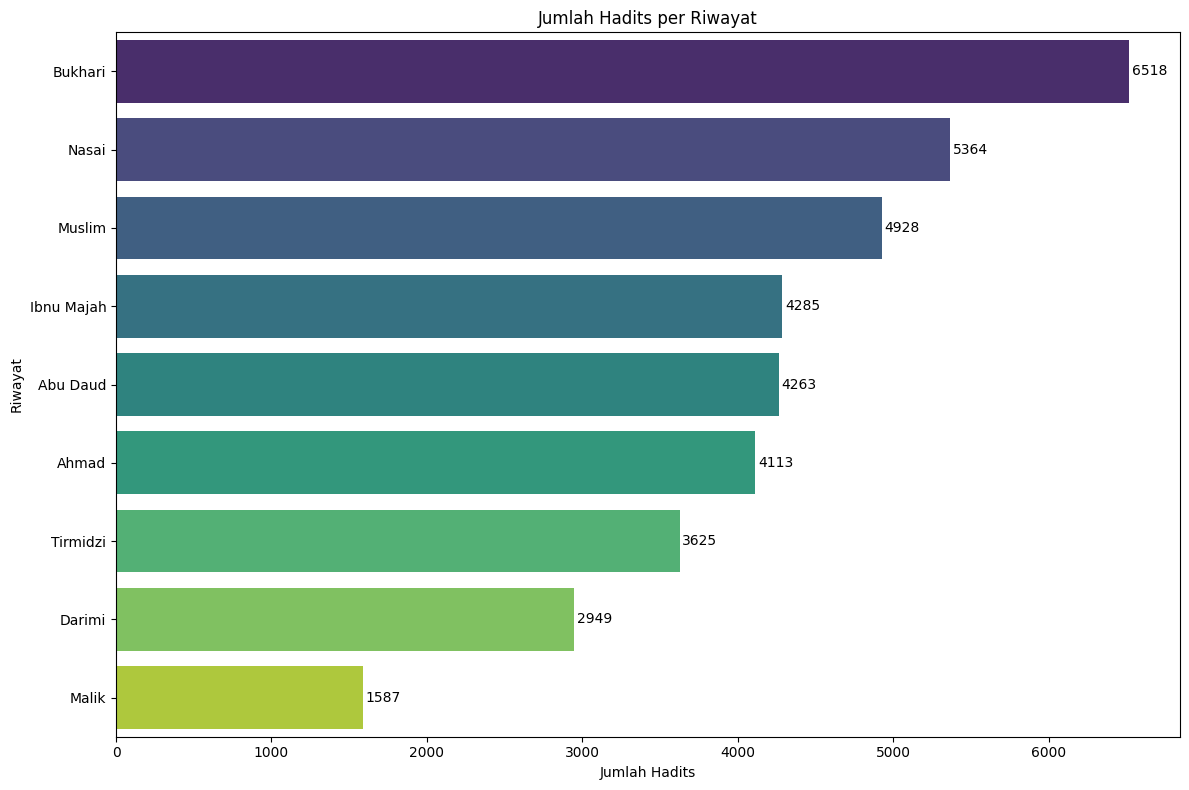

In [12]:
# Menghitung jumlah hadits untuk setiap riwayat
riwayat_counts = df_hadits.groupby('Riwayat').size().reset_index(name='Jumlah Hadits')

# Mengurutkan berdasarkan jumlah hadits terbanyak
riwayat_counts = riwayat_counts.sort_values(by='Jumlah Hadits', ascending=False)

# Menampilkan grafik batang (bar chart)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Jumlah Hadits', y='Riwayat', data=riwayat_counts, palette='viridis')

# Menambahkan teks pada samping batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 130, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title('Jumlah Hadits per Riwayat')
plt.xlabel('Jumlah Hadits')
plt.ylabel('Riwayat')

# Mengatur layout agar teks tidak terpotong
plt.tight_layout()

# Menampilkan grafik
plt.show()

Preprocessing

In [33]:
# Unduh stopwords dari nltk (pertama kali)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Daftar stopwords bahasa Indonesia dari nltk
stopwords = set(stopwords.words('indonesian'))

In [35]:
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

In [37]:
# Preprocessing
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus semua karakter non-huruf dan non-angka

    # Menghapus spasi ekstra (spasi ganda atau spasi di awal/akhir)
    text = re.sub(r'\s+', ' ', text)  # Mengganti spasi ganda dengan satu spasi
    text = text.strip()  # Menghapus spasi di awal dan akhir teks

    # Menghapus stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])

    # Stemming: Mengembalikan kata ke bentuk dasar menggunakan NLTK
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text

In [38]:
# Terapkan preprocessing ke masing-masing DataFrame
# df_hadits['Terjemahan Indonesia'] = df_hadits['Terjemahan Indonesia'].apply(preprocess_text)
# df_quran['Terjemahan Indonesia'] = df_quran['Terjemahan Indonesia'].apply(preprocess_text)
df_fatwa['Fatwa'] = df_fatwa['Fatwa'].apply(preprocess_text)

In [39]:
df_hadits.head()

Riwayat  Nomor Hadits                               Terjemahan Indonesia
0  Abu Daud             1  Telah menceritakan kepada kami [Abdullah bin M...
1  Abu Daud             2  Telah menceritakan kepada kami [Musaddad bin M...
2  Abu Daud             3  Telah menceritakan kepada kami [Musa bin Isma'...
3  Abu Daud             4  Telah menceritakan kepada kami [Musaddad bin M...
4  Abu Daud             5  Telah menceritakan kepada kami [Amru bin Marzu...

In [40]:
df_quran.head()

Surah  Ayat ke-                               Terjemahan Indonesia
0  Al-Fatihah         1  Dengan nama Allah Yang Maha Pengasih lagi Maha...
1  Al-Fatihah         2         Segala puji bagi Allah, Tuhan semesta alam
2  Al-Fatihah         3            Yang Maha Pengasih lagi Maha Penyayang,
3  Al-Fatihah         4                           Pemilik hari Pembalasan.
4  Al-Fatihah         5  Hanya kepada Engkaulah kami menyembah dan hany...

In [41]:
df_fatwa.head()

Fatwa
0  1 pedoman pensyarian atur perundangundangan 2 ...
1  1 kaya usaha penuh tentu zakat wajib keluar za...
2  status hukum khitan perempuan 1 khitan lakilak...
3  1 dana bpih haram tempat bank ribawi konvensio...
4  1 dasar buat pinjam pinjam hutang piutang bent...

Exploratory Data Analysis (EDA)

In [22]:
df_hadits['Text Length'] = df_hadits['Terjemahan Indonesia'].apply(len)
df_quran['Text Length'] = df_quran['Terjemahan Indonesia'].apply(len)
df_fatwa['Text Length'] = df_fatwa['Fatwa'].apply(len)

In [23]:
# Menghitung panjang teks maksimum dan minimum untuk masing-masing dataset
max_length_hadits = df_hadits['Text Length'].max()
min_length_hadits = df_hadits['Text Length'].min()
max_length_quran = df_quran['Text Length'].max()
min_length_quran = df_quran['Text Length'].min()
max_length_fatwa = df_fatwa['Text Length'].max()
min_length_fatwa = df_fatwa['Text Length'].min()

# Menampilkan hasil dalam bentuk teks
print(f"Hadits - Max Text Length: {max_length_hadits} characters")
print(f"Hadits - Min Text Length: {min_length_hadits} characters")
print(f"Quran - Max Text Length: {max_length_quran} characters")
print(f"Quran - Min Text Length: {min_length_quran} characters")
print(f"Fatwa - Max Text Length: {max_length_fatwa} characters")
print(f"Fatwa - Min Text Length: {min_length_fatwa} characters")

Hadits - Max Text Length: 16384 characters
Hadits - Min Text Length: 72 characters
Quran - Max Text Length: 1620 characters
Quran - Min Text Length: 6 characters
Fatwa - Max Text Length: 6620 characters
Fatwa - Min Text Length: 35 characters


In [24]:
# Menghitung rata-rata panjang teks untuk masing-masing dataset
mean_length_quran = df_quran['Text Length'].mean()
mean_length_hadits = df_hadits['Text Length'].mean()
mean_length_fatwa = df_fatwa['Text Length'].mean()

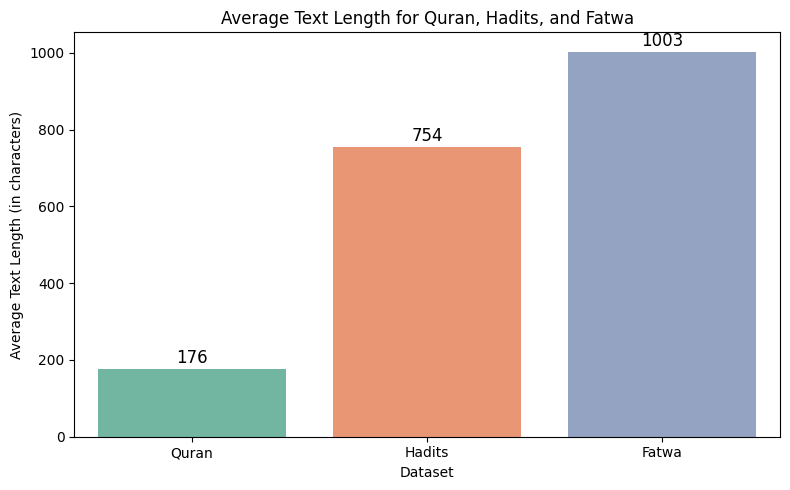

In [25]:
# Visualisasi Rata-rata Panjang Teks dengan Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=['Quran', 'Hadits', 'Fatwa'], y=[mean_length_quran, mean_length_hadits, mean_length_fatwa], palette='Set2')

# Menambahkan teks di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 5),  # Menambahkan offset vertikal untuk teks
                ha='center', va='bottom', fontsize=12, color='black')

# Menambahkan judul dan label
plt.title('Average Text Length for Quran, Hadits, and Fatwa')
plt.xlabel('Dataset')
plt.ylabel('Average Text Length (in characters)')

# Mengatur layout agar teks tidak terpotong
plt.tight_layout()

# Menampilkan grafik
plt.show()

In [26]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from wordcloud import WordCloud

In [28]:
# Fungsi untuk membuat dan menampilkan WordCloud
def generate_ngram_wordcloud(text_data, ngram_range=(1,1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams_matrix = vectorizer.fit_transform(text_data)
    ngrams_freq = ngrams_matrix.sum(axis=0).A1
    ngrams = [(word, ngrams_freq[idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams = sorted(ngrams, key=lambda x: x[1], reverse=True)

    # Membuat wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(ngrams))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

WordCloud for Quran - Unigrams


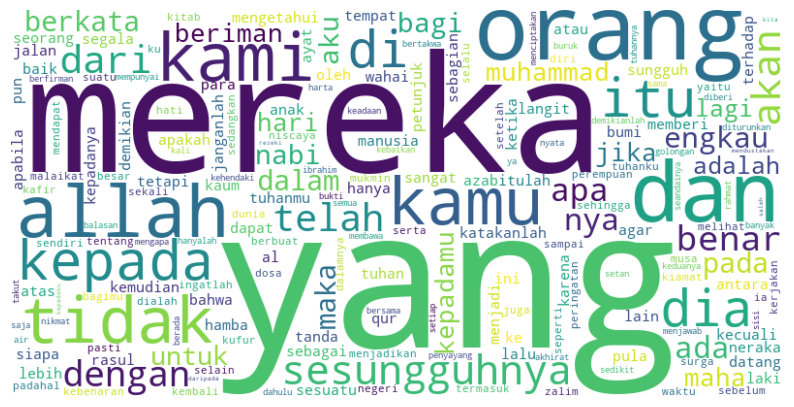


WordCloud for Quran - Bigrams


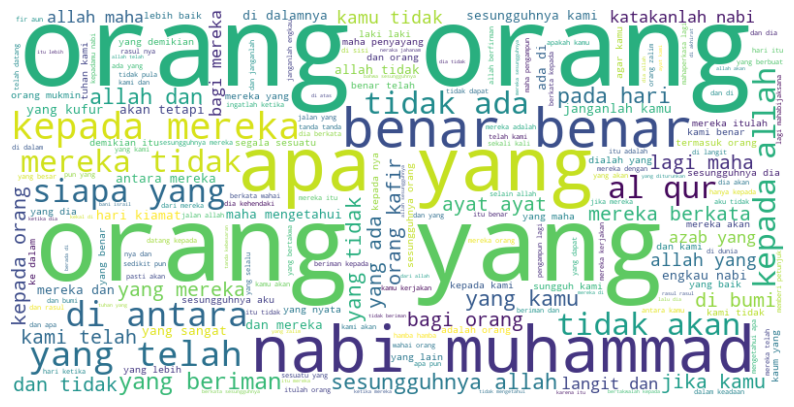


WordCloud for Quran - Trigrams


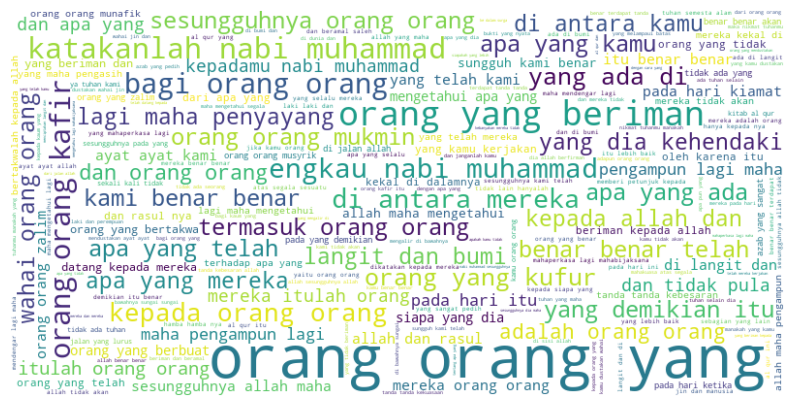


WordCloud for Hadits - Unigrams


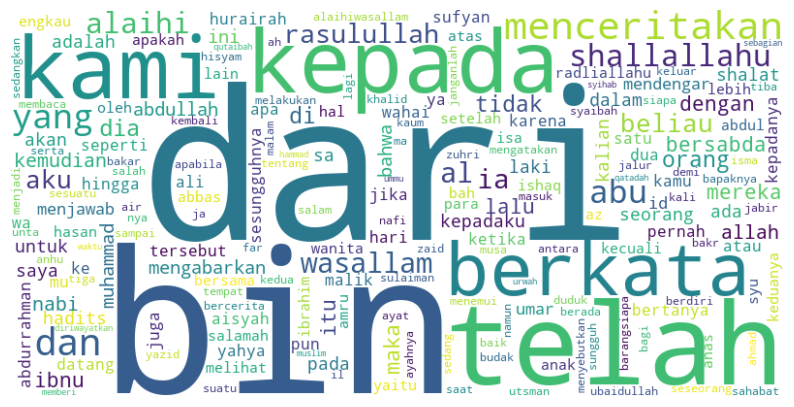


WordCloud for Hadits - Bigrams


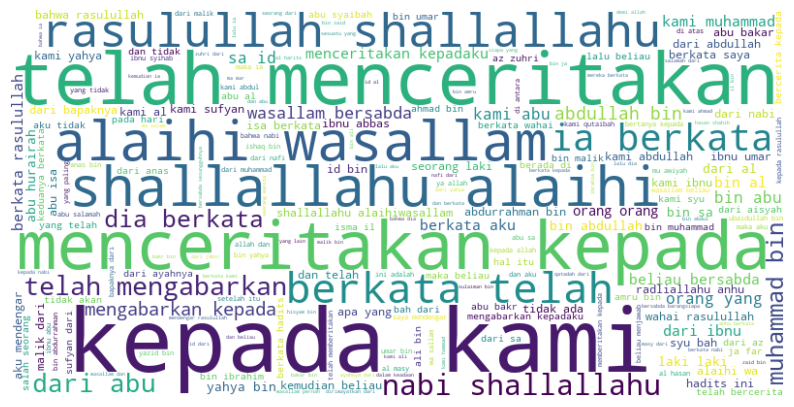


WordCloud for Hadits - Trigrams


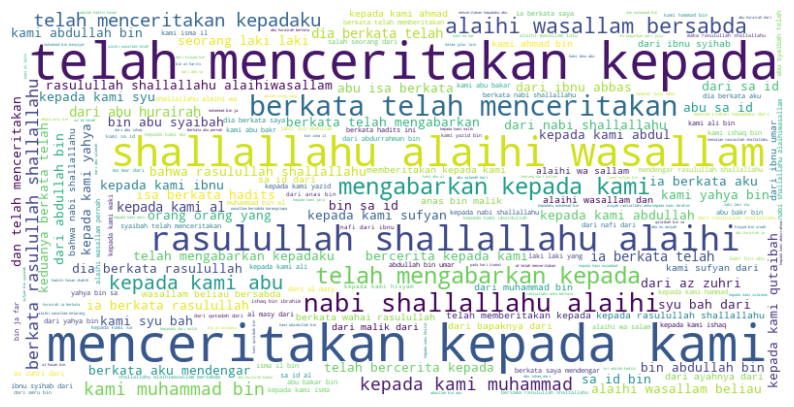


WordCloud for Fatwa - Unigrams


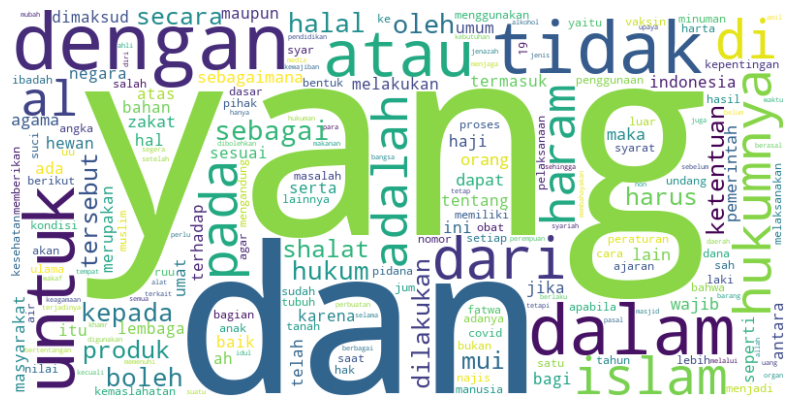


WordCloud for Fatwa - Bigrams


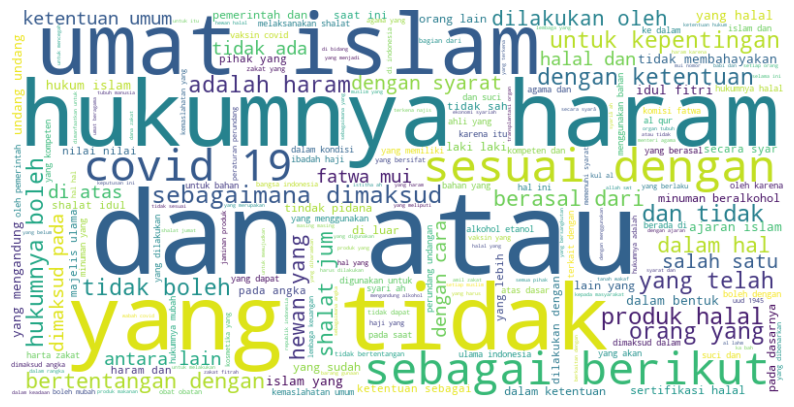


WordCloud for Fatwa - Trigrams


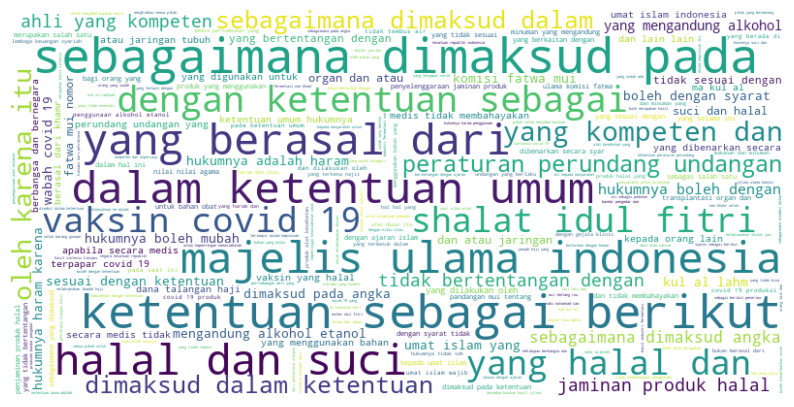

In [30]:
# Ngram untuk Quran (Unigrams, Bigrams, Trigrams)
print("WordCloud for Quran - Unigrams")
generate_ngram_wordcloud(df_quran['Terjemahan Indonesia'], ngram_range=(1, 1))  # Unigrams

print()

print("WordCloud for Quran - Bigrams")
generate_ngram_wordcloud(df_quran['Terjemahan Indonesia'], ngram_range=(2, 2))  # Bigrams

print()

print("WordCloud for Quran - Trigrams")
generate_ngram_wordcloud(df_quran['Terjemahan Indonesia'], ngram_range=(3, 3))  # Trigrams

print()

# Ngram untuk Hadits (Unigrams, Bigrams, Trigrams)
print("WordCloud for Hadits - Unigrams")
generate_ngram_wordcloud(df_hadits['Terjemahan Indonesia'], ngram_range=(1, 1))  # Unigrams

print()

print("WordCloud for Hadits - Bigrams")
generate_ngram_wordcloud(df_hadits['Terjemahan Indonesia'], ngram_range=(2, 2))  # Bigrams

print()

print("WordCloud for Hadits - Trigrams")
generate_ngram_wordcloud(df_hadits['Terjemahan Indonesia'], ngram_range=(3, 3))  # Trigrams

print()

# Ngram untuk Fatwa (Unigrams, Bigrams, Trigrams)
print("WordCloud for Fatwa - Unigrams")
generate_ngram_wordcloud(df_fatwa['Fatwa'], ngram_range=(1, 1))  # Unigrams

print()

print("WordCloud for Fatwa - Bigrams")
generate_ngram_wordcloud(df_fatwa['Fatwa'], ngram_range=(2, 2))  # Bigrams

print()

print("WordCloud for Fatwa - Trigrams")
generate_ngram_wordcloud(df_fatwa['Fatwa'], ngram_range=(3, 3))  # Trigrams

print()

Memberi Label

IndoBERT

In [42]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from transformers import AutoTokenizer, AutoModel
import torch

# Memastikan CUDA tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Memuat tokenizer dan model IndoBERT
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p2").to(device)

# Fungsi untuk mendapatkan embedding dari batch teks
def get_batch_embedding(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Mengambil rata-rata dari seluruh token
    return embeddings

# Fungsi untuk menghasilkan embeddings secara independen
def process_embeddings(df_fatwa, df_quran, df_hadits, batch_size=8):
    def generate_embeddings(df, column_name):
        embeddings = []
        for start_idx in range(0, len(df), batch_size):
            end_idx = min(start_idx + batch_size, len(df))
            batch_texts = df[column_name][start_idx:end_idx].tolist()
            batch_embeddings = get_batch_embedding(batch_texts)
            embeddings.append(batch_embeddings)
        return torch.cat(embeddings, dim=0)

    # Generate embeddings untuk masing-masing dataset
    fatwa_embeddings = generate_embeddings(df_fatwa, 'Fatwa')
    quran_embeddings = generate_embeddings(df_quran, 'Terjemahan Indonesia')
    hadits_embeddings = generate_embeddings(df_hadits, 'Terjemahan Indonesia')

    return fatwa_embeddings, quran_embeddings, hadits_embeddings


# Proses batch dan dapatkan embedding
fatwa_embeddings, quran_embeddings, hadits_embeddings = process_embeddings(
    df_fatwa=df_fatwa,
    df_quran=df_quran,
    df_hadits=df_hadits,
    batch_size=8
)

# Pastikan embeddings berada di perangkat yang diinginkan (misalnya GPU atau CPU)
fatwa_embeddings = fatwa_embeddings.to("cpu")
quran_embeddings = quran_embeddings.to("cpu")
hadits_embeddings = hadits_embeddings.to("cpu")

Using device: cuda


In [44]:
# Membuat DataFrame untuk Quran Embeddings
fatwa_embeddings_list = fatwa_embeddings.tolist()  # Convert tensor to list
df_fatwa_embeddings = pd.DataFrame(fatwa_embeddings_list, columns=[f"Fatwa_Embedding_{i}" for i in range(len(fatwa_embeddings_list[0]))])

In [45]:
# Membuat DataFrame untuk Quran Embeddings
quran_embeddings_list = quran_embeddings.tolist()  # Convert tensor to list
df_quran_embeddings = pd.DataFrame(quran_embeddings_list, columns=[f"Quran_Embedding_{i}" for i in range(len(quran_embeddings_list[0]))])

# Membuat DataFrame untuk Hadits Embeddings
hadits_embeddings_list = hadits_embeddings.tolist()  # Convert tensor to list
df_hadits_embeddings = pd.DataFrame(hadits_embeddings_list, columns=[f"Hadits_Embedding_{i}" for i in range(len(hadits_embeddings_list[0]))])

In [46]:
# Menyimpan df_quran_embeddings ke dalam file CSV
df_fatwa_embeddings.to_csv('fatwa_embeddings.csv', index=False)

In [47]:
# # Menyimpan df_quran_embeddings ke dalam file CSV
# df_quran_embeddings.to_csv('quran_embeddings.csv', index=False)

# # Menyimpan df_hadits_embeddings ke dalam file CSV
# df_hadits_embeddings.to_csv('hadits_embeddings.csv', index=False)

# # Menyimpan df_quran_embeddings ke dalam file CSV
df_quran_embeddings.to_csv('quran_embeddings_without_preprocessing.csv', index=False)

# # Menyimpan df_hadits_embeddings ke dalam file CSV
df_hadits_embeddings.to_csv('hadits_embeddings_without_preprocessing.csv', index=False)


Concanate Fatwa and Quran/Hadits

In [48]:
import os
import pandas as pd

In [49]:
# Ganti dengan path lengkap file CSV Anda
df_fatwa_embeddings = os.path.join(os.getcwd(), 'fatwa_embeddings.csv')

# Membaca file CSV ke dalam DataFrame
df_fatwa_embeddings = pd.read_csv(df_fatwa_embeddings)

# Menyatukan kolom Quran_Embedding_n ke dalam satu kolom quran_embeddings sebagai list
embedding_columns = [col for col in df_fatwa_embeddings.columns if col.startswith('Fatwa_Embedding_')]
df_fatwa_embeddings['fatwa_embeddings'] = df_fatwa_embeddings[embedding_columns].values.tolist()

# Menghapus kolom-kolom asli jika tidak diperlukan lagi
df_fatwa_embeddings.drop(columns=embedding_columns, inplace=True)

In [50]:
df_fatwa_embeddings.head()

fatwa_embeddings
0  [-0.5030987858772278, 0.6881948709487915, 0.31...
1  [-0.7566537857055664, 0.8642093539237976, -0.6...
2  [0.2352502048015594, 1.4238264560699463, 0.150...
3  [-0.377417653799057, 1.2618725299835205, 0.161...
4  [0.1649837046861648, 1.5289937257766724, 0.039...

In [51]:
# Ganti dengan path lengkap file CSV Anda
df_quran_embeddings = os.path.join(os.getcwd(), 'quran_embeddings.csv')

# Membaca file CSV ke dalam DataFrame
df_quran_embeddings = pd.read_csv(df_quran_embeddings)

# Menyatukan kolom Quran_Embedding_n ke dalam satu kolom quran_embeddings sebagai list
embedding_columns = [col for col in df_quran_embeddings.columns if col.startswith('Quran_Embedding_')]
df_quran_embeddings['quran_embeddings'] = df_quran_embeddings[embedding_columns].values.tolist()

# Menghapus kolom-kolom asli jika tidak diperlukan lagi
df_quran_embeddings.drop(columns=embedding_columns, inplace=True)

In [52]:
df_quran_embeddings.head()

quran_embeddings
0  [-0.4424076378345489, 1.0717854499816897, 0.34...
1  [-0.9551824331283568, 0.825697124004364, 1.538...
2  [-0.5065692067146301, 1.4653441905975342, 0.38...
3  [0.17152139544487, 1.689182162284851, 0.062098...
4  [-0.6754551529884338, 1.4691895246505735, 0.90...

In [53]:
# Ganti dengan path lengkap file CSV Anda
df_hadits_embeddings = os.path.join(os.getcwd(), 'hadits_embeddings.csv')

# Membaca file CSV ke dalam DataFrame
df_hadits_embeddings = pd.read_csv(df_hadits_embeddings)

# Menyatukan kolom Quran_Embedding_n ke dalam satu kolom quran_embeddings sebagai list
embedding_columns = [col for col in df_hadits_embeddings.columns if col.startswith('Hadits_Embedding_')]
df_hadits_embeddings['hadits_embeddings'] = df_hadits_embeddings[embedding_columns].values.tolist()

# Menghapus kolom-kolom asli jika tidak diperlukan lagi
df_hadits_embeddings.drop(columns=embedding_columns, inplace=True)

In [54]:
df_hadits_embeddings.head()

hadits_embeddings
0  [-0.1572113335132599, 0.3967912495136261, 0.00...
1  [-0.0993170887231826, 0.2982016801834106, -0.1...
2  [0.4674349129199981, 0.911553144454956, -0.260...
3  [-0.3498216867446899, 0.8978636264801025, -0.2...
4  [-0.2440782785415649, 0.4300823509693146, 0.07...

In [55]:
import itertools

# Buat pasangan Fatwa-Quran
fatwa_quran_pairs = pd.DataFrame(
    list(itertools.product(
        df_fatwa_embeddings['fatwa_embeddings'],
        df_quran_embeddings['quran_embeddings']
    )),
    columns=['Fatwa_Embedding', 'Quran_Embedding']
)

In [56]:
# Buat pasangan Fatwa-Hadits
fatwa_hadits_pairs = pd.DataFrame(
    list(itertools.product(
        df_fatwa_embeddings['fatwa_embeddings'],
        df_hadits_embeddings['hadits_embeddings']
    )),
    columns=['Fatwa_Embedding', 'Hadits_Embedding']
)

In [57]:
# Gabungkan Quran_Embedding dan Hadits_Embedding di masing-masing tabel
fatwa_quran_pairs['Quran_Hadits_Embedding'] = fatwa_quran_pairs['Quran_Embedding']
fatwa_hadits_pairs['Quran_Hadits_Embedding'] = fatwa_hadits_pairs['Hadits_Embedding']

# Hapus kolom Quran_Embedding dan Hadits_Embedding
fatwa_quran_pairs.drop(columns=['Quran_Embedding'], inplace=True)
fatwa_hadits_pairs.drop(columns=['Hadits_Embedding'], inplace=True)

# Gabungkan tabel Fatwa-Quran dan Fatwa-Hadits
combined_pairs = pd.concat([fatwa_quran_pairs, fatwa_hadits_pairs], ignore_index=True)

In [58]:
combined_pairs.head()

Fatwa_Embedding  \
0  [-0.5030987858772278, 0.6881948709487915, 0.31...   
1  [-0.5030987858772278, 0.6881948709487915, 0.31...   
2  [-0.5030987858772278, 0.6881948709487915, 0.31...   
3  [-0.5030987858772278, 0.6881948709487915, 0.31...   
4  [-0.5030987858772278, 0.6881948709487915, 0.31...   

                              Quran_Hadits_Embedding  
0  [-0.4424076378345489, 1.0717854499816897, 0.34...  
1  [-0.9551824331283568, 0.825697124004364, 1.538...  
2  [-0.5065692067146301, 1.4653441905975342, 0.38...  
3  [0.17152139544487, 1.689182162284851, 0.062098...  
4  [-0.6754551529884338, 1.4691895246505735, 0.90...

In [59]:
combined_pairs.shape

(15090592, 2)

In [60]:
import torch

# Cek apakah GPU tersedia
if torch.cuda.is_available():
    print("GPU is available.")
    # Menampilkan nama GPU yang tersedia
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available. Using CPU instead.")


GPU is available.
Using GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [62]:
import torch

# Fungsi untuk menghitung cosine similarity dengan PyTorch
def calculate_cosine_similarity_torch(embedding1, embedding2, device):
    # Konversi embedding ke tensor dan pindahkan ke GPU
    embedding1 = torch.tensor(embedding1, dtype=torch.float32, device=device)
    embedding2 = torch.tensor(embedding2, dtype=torch.float32, device=device)

    # Menghitung cosine similarity
    similarity = torch.nn.functional.cosine_similarity(embedding1.unsqueeze(0), embedding2.unsqueeze(0))
    return similarity.item()

# Pastikan PyTorch mendeteksi GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Menambahkan kolom cosine similarity dengan GPU
combined_pairs['Cosine Similarity'] = combined_pairs.apply(
    lambda row: calculate_cosine_similarity_torch(
        row['Fatwa_Embedding'], row['Quran_Hadits_Embedding'], device
    ),
    axis=1
)

Using device: cuda


In [68]:
combined_pairs.head()

Fatwa_Embedding  \
0  [-0.5030987858772278, 0.6881948709487915, 0.31...   
1  [-0.5030987858772278, 0.6881948709487915, 0.31...   
2  [-0.5030987858772278, 0.6881948709487915, 0.31...   
3  [-0.5030987858772278, 0.6881948709487915, 0.31...   
4  [-0.5030987858772278, 0.6881948709487915, 0.31...   

                              Quran_Hadits_Embedding  Cosine Similarity  
0  [-0.4424076378345489, 1.0717854499816897, 0.34...           0.256238  
1  [-0.9551824331283568, 0.825697124004364, 1.538...           0.228715  
2  [-0.5065692067146301, 1.4653441905975342, 0.38...           0.259600  
3  [0.17152139544487, 1.689182162284851, 0.062098...           0.282458  
4  [-0.6754551529884338, 1.4691895246505735, 0.90...           0.348206

In [69]:
# combined_pairs.to_csv('fatwa_embeddings_cosine_similarity.csv', index=False)
# combined_pairs.to_pickle('fatwa_embeddings_cosine_similarity.pkl')

combined_pairs.to_pickle('fatwa_embeddings_cosine_similarity_without_preprocessing.pkl')

In [3]:
import pandas as pd

# Membaca file .pkl
combined_pairs = pd.read_pickle('fatwa_embeddings_cosine_similarity.pkl')
# combined_pairs = pd.read_pickle('fatwa_embeddings_cosine_similarity_without_preprocessing.pkl')

In [4]:
combined_pairs.head()

Fatwa_Embedding  \
0  [-0.5030991435050964, 0.6881945729255676, 0.31...   
1  [-0.5030991435050964, 0.6881945729255676, 0.31...   
2  [-0.5030991435050964, 0.6881945729255676, 0.31...   
3  [-0.5030991435050964, 0.6881945729255676, 0.31...   
4  [-0.5030991435050964, 0.6881945729255676, 0.31...   

                              Quran_Hadits_Embedding  Cosine Similarity  
0  [-0.4424076378345489, 1.0717854499816897, 0.34...           0.256238  
1  [-0.9551824331283568, 0.825697124004364, 1.538...           0.228715  
2  [-0.5065692067146301, 1.4653441905975342, 0.38...           0.259600  
3  [0.17152139544487, 1.689182162284851, 0.062098...           0.282458  
4  [-0.6754551529884338, 1.4691895246505735, 0.90...           0.348206

Find Top 5 Similarity

Without Preprocesing

In [72]:
# Menampilkan 5 baris dengan Cosine Similarity tertinggi beserta indeks
top_5_similarity = combined_pairs.nlargest(5, 'Cosine Similarity')
top_5_similarity[['Cosine Similarity']]

Cosine Similarity
3413946            0.858697
14083348           0.855173
10473094           0.849180
14422357           0.848518
10486475           0.845810

In [73]:
# Konstanta panjang dataset
fatwa_len = 344
quran_len = 6236
hadits_len = 37632

# Indeks yang ditemukan
found_indices = [3413946, 14083348, 10473094, 14422357, 10486475]

# Fungsi untuk mencari referensi berdasarkan index
def find_references(index):
    # Jika index kurang dari atau sama dengan kombinasi Fatwa-Quran
    if index < fatwa_len * quran_len:  # Pasangan Fatwa-Quran
        fatwa_index = index // quran_len
        quran_index = index % quran_len
        return f"Fatwa: {fatwa_index}, Quran: {quran_index}"
    else:  # Pasangan Fatwa-Hadits
        # Hitung offset (indeks dalam pasangan Fatwa-Hadits)
        offset = index - (fatwa_len * quran_len)
        fatwa_index = offset // hadits_len
        hadits_index = offset % hadits_len
        return f"Fatwa: {fatwa_index}, Hadits: {hadits_index}"

# Mencari referensi untuk semua indeks
references = [find_references(index) for index in found_indices]

# Menampilkan hasil
for idx, ref in zip(found_indices, references):
    print(f"Index {idx} -> {ref}")

Index 3413946 -> Fatwa: 33, Hadits: 26906
Index 14083348 -> Fatwa: 317, Hadits: 8820
Index 10473094 -> Fatwa: 221, Hadits: 11238
Index 14422357 -> Fatwa: 326, Hadits: 9141
Index 10486475 -> Fatwa: 221, Hadits: 24619


In [76]:
# Menampilkan baris dengan indeks 33 di df_fatwa
fatwa_reference = df_fatwa.iloc[33]['Fatwa']
fatwa_reference

'1 pimpin imam pelihara bebas salah dosa mashum wajib ikut situasi kondisi apa yakin salah bathil hukum haram 2 wajib taat pimpin imam batas imam taat allah swt rasul 3 pimpin imam terima wahyu nabi dhalal sesat sebab kafir 4 kafir takfir orang islam aku ishmatul imam sebab tuduh kafir'

In [77]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[26906]['Terjemahan Indonesia']
hadits_reference

'Telah menceritakan kepada kami Ibrahim dari Muslim telah menceritakan kepadaku [Zuhair bin Harb] telah menceritakan kepada kami [Syababah] telah menceritakan kepadaku [Warqa`] dari [Abu Az Zinad] dari [Al A\'raj] dari [Abu Hurairah] dari Nabi shallallahu \'alaihi wasallam, beliau bersabda: "Seorang imam itu ibarat perisai, seseorang berperang di belakangnya (mendukung) dan berlindung (dari musuh) dengan (kekuasaan) nya. Jika seorang imam (pemimpin) memerintahkan supaya takwa kepada Allah \'azza wajalla dan berlaku adil, maka dia (imam) akan mendapatkan pahala karenanya, dan jika dia (imam) memerintahkan selain itu, maka ia akan mendapatkan siksa."'

With Preprocessing

In [5]:
# Menampilkan 5 baris dengan Cosine Similarity tertinggi beserta indeks
top_5_similarity = combined_pairs.nlargest(5, 'Cosine Similarity')
top_5_similarity[['Cosine Similarity']]

Cosine Similarity
3413946            0.858697
14083348           0.855173
10473094           0.849180
14422357           0.848518
10486475           0.845810

Mengambil baris dengan masing2 similarity 0.6, 0.7 dan 0.8

In [11]:
# Fungsi untuk mencari nilai yang paling mendekati target
def find_closest_value(df, target):
    closest_idx = (df['Cosine Similarity'] - target).abs().idxmin()
    return df.loc[closest_idx]

# Mencari nilai yang paling mendekati 0.6, 0.7, dan 0.8
closest_0_6 = find_closest_value(combined_pairs, 0.6)
closest_0_7 = find_closest_value(combined_pairs, 0.7)
closest_0_8 = find_closest_value(combined_pairs, 0.81)

# Menampilkan hasil dan nilai similarity
print(f"Closest to 0.6: {closest_0_6[['Cosine Similarity']]}, Similarity: {closest_0_6['Cosine Similarity']}")
print(f"Closest to 0.7: {closest_0_7[['Cosine Similarity']]}, Similarity: {closest_0_7['Cosine Similarity']}")
print(f"Closest to 0.8: {closest_0_8[['Cosine Similarity']]}, Similarity: {closest_0_8['Cosine Similarity']}")


Closest to 0.6: Cosine Similarity    0.6
Name: 4110428, dtype: object, Similarity: 0.6000000238418579
Closest to 0.7: Cosine Similarity    0.7
Name: 4653626, dtype: object, Similarity: 0.7000000476837158
Closest to 0.8: Cosine Similarity    0.810028
Name: 12707682, dtype: object, Similarity: 0.8100283145904541


In [12]:
# Konstanta panjang dataset
fatwa_len = 344
quran_len = 6236
hadits_len = 37632

# Indeks yang ditemukan
found_indices = [4110428, 4653626, 12707682]

# Fungsi untuk mencari referensi berdasarkan index
def find_references(index):
    # Jika index kurang dari atau sama dengan kombinasi Fatwa-Quran
    if index < fatwa_len * quran_len:  # Pasangan Fatwa-Quran
        fatwa_index = index // quran_len
        quran_index = index % quran_len
        return f"Fatwa: {fatwa_index}, Quran: {quran_index}"
    else:  # Pasangan Fatwa-Hadits
        # Hitung offset (indeks dalam pasangan Fatwa-Hadits)
        offset = index - (fatwa_len * quran_len)
        fatwa_index = offset // hadits_len
        hadits_index = offset % hadits_len
        return f"Fatwa: {fatwa_index}, Hadits: {hadits_index}"

# Mencari referensi untuk semua indeks
references = [find_references(index) for index in found_indices]

# Menampilkan hasil
for idx, ref in zip(found_indices, references):
    print(f"Index {idx} -> {ref}")

Index 4110428 -> Fatwa: 52, Hadits: 8380
Index 4653626 -> Fatwa: 66, Hadits: 24730
Index 12707682 -> Fatwa: 280, Hadits: 25538


Similarity 0.6

In [16]:
# Menampilkan baris dengan indeks 33 di df_fatwa
fatwa_reference = df_fatwa.iloc[52]['Fatwa']
fatwa_reference

'1. Zakat fitrah hukumnya wajib dikeluarkan oleh setiap muslim atas\ndirinya dan jiwa yang menjadi tanggungannya saat menjelang idul\nfitri dengan ketentuan bahwa ia masih hidup pada malam hari raya\ndan memiliki kelebihan dari kebutuhan pokoknya untuk sehari.\n2. Zakat fitrah dibayarkan dalam bentuk makanan pokok.\n3. Kadar zakat fitrah adalah 1 sha\x92 yang jika dikonversi ke beras\nmenjadi 2,7 kg atau 3,5 liter.\n4. Zakat fitrah dapat dibayarkan dengan uang yang diamanahkan\nkepada panitia untuk dibelikan makanan pokok.\n5. Nilai zakat fitrah berupa beras, jika dinominalkan mengacu kepada:\na. Harga jenis beras yang dikonsumsi muzakki.\nb. Sesuai dengan harga pasar setempat.\n6. Khusus bagi warga umat Islam yang makanan pokoknya bukan\nberas, maka zakat fitrah yang dikeluarkan sesuai dengan makanan\npokok setempat.\n7. Menyegerakan pembayaran zakat fitrah sejak awal Ramadan\nhukumnya boleh.\n8. Waktu wajib membayar zakat fitrah adalah sebelum\ndilaksanakannya shalat Idul Fitri.\n9. 

In [17]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[8380]['Terjemahan Indonesia']
hadits_reference

"Telah menceritakan kepada kami [Abdan] dia berkata, telah mengabarkan kepada kami [Abdullah] telah mengabarkan kepada kami [Yunus] dari [Az Zuhri] dan dengan riwayat yang sama, telah menceritakan pula kepada kami [Bisyir bin Muhammad] berkata, telah mengabarkan kepada kami [Abdullah] berkata, telah mengabarkan kepada kami [Yunus] dan [Ma'mar] dari [Az Zuhri] seperti lainnya berkata, telah mengabarkan kepada kami [Ubaidullah bin Abdullah] dari [Ibnu 'Abbas] berkata, bahwa Rasulullah shallallahu 'alaihi wasallam adalah manusia yang paling lembut terutama pada bulan Ramadlan ketika malaikat Jibril 'Alaihis Salam menemuinya, dan adalah Jibril 'Alaihis Salam mendatanginya setiap malam di bulan Ramadlan, dimana Jibril 'Alaihis Salam mengajarkan Al Qur'an. Sungguh Rasulullah shallallahu 'alaihi wasallam jauh lebih lembut daripada angin yang berhembus."

Similarity 0.7

In [18]:
# Menampilkan baris dengan indeks 33 di df_fatwa
fatwa_reference = df_fatwa.iloc[66]['Fatwa']
fatwa_reference

"1. Melihat mushaf al-Qur'an saat shalat tidak membatalkan shalat.\n2. Membaca ayat Al-Qur'an dengan cara melihat mushaf bagi orang yang sedang shalat hukumnya boleh jika ada kebutuhan sepanjang tidak mengganggu kekhusyu'an dan tidak melakukan gerakan yang membatalkan shalat.\n3. Untuk menjaga kekhusyu'an shalat maka imam shalat diutamakan membaca ayat al-Qur'an bil ghaib (dengan hafalan, tanpa melihat mushaf)."

In [19]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[24730]['Terjemahan Indonesia']
hadits_reference

'Dan telah menceritakan kepadaku [Nashr bin Ali Al Juhdlami] telah menceritakan kepada kami [Bisyr yaitu Ibn Al Mufadlal] dari [Khalid] dari [Anas bin Sirin] katanya; aku mendengar [Jundab bin Abdullah] berkata; Rasulullah shallallahu \'alaihi wasallam bersabda: "Barangsiapa shalat subuh, maka ia berada dalam jaminan Allah, oleh karena itu jangan sampai Allah menuntut sesuatu dari kalian sebagai imbalan jaminan-Nya, sehingga Allah menangkapnya dan menyungkurkannya ke dalam neraka jahannam."'

Similairy 0.8

In [20]:
# Menampilkan baris dengan indeks 33 di df_fatwa
fatwa_reference = df_fatwa.iloc[280]['Fatwa']
fatwa_reference

'1. Penghasilan dari jasa dapat dikenakan zakat \napabila sampai nisab dan haul. \n2. Yang berhak menerima zakat hanya delapan \nashnaf yang tersebut dalam Al-Qur\x92an pada \nsurat at-Taubah ayat 60. Apabila salah \nsatu ashnaf tidak ada, bagiannya diberikan \nkepada ashnaf yang ada. 3. Untuk kepentingan dan kemaslahatan umat \nIslam, maka yang tidak dapat dipungut \nmelalui saluran zakat, dapat diminta atas \nnama infaq atau shadaqah.\n4. Infaq dan shadaqah yang diatur pungutannya \noleh Ulil Amri, untuk kepentingan tersebut \ndi atas, wajib ditaati oleh umat Islam \nmenurut kemampuannya. '

In [21]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[25538]['Terjemahan Indonesia']
hadits_reference

'Telah menceritakan kepada kami [Qutaibah bin Sa\'id] telah menceritakan kepada kami [Bakr bin Manshur] dari [Amru bin Harits] dari [Bukair] dari [Yazid] Maula Salamah, dari [Salamah bin Al Akwa\'] ia berkata; Ketika turun ayat; "…dan wajib bagi orang-orang yang berat menjalankannya (jika mereka tidak berpuasa) membayar fidyah, (yaitu): memberi makan seorang miskin…". (QS. Albaqarah 184), banyak orang yang menginginkan untuk tetap makan (tidak berpuasa) dan hanya membayar fidyah, sampai turun ayat setelahnya dan iapun saya me-nasakh-nya.'

In [8]:
# Konstanta panjang dataset
fatwa_len = 344
quran_len = 6236
hadits_len = 37632

# Indeks yang ditemukan
found_indices = [3413946, 14083348, 10473094, 14422357, 10486475]

# Fungsi untuk mencari referensi berdasarkan index
def find_references(index):
    # Jika index kurang dari atau sama dengan kombinasi Fatwa-Quran
    if index < fatwa_len * quran_len:  # Pasangan Fatwa-Quran
        fatwa_index = index // quran_len
        quran_index = index % quran_len
        return f"Fatwa: {fatwa_index}, Quran: {quran_index}"
    else:  # Pasangan Fatwa-Hadits
        # Hitung offset (indeks dalam pasangan Fatwa-Hadits)
        offset = index - (fatwa_len * quran_len)
        fatwa_index = offset // hadits_len
        hadits_index = offset % hadits_len
        return f"Fatwa: {fatwa_index}, Hadits: {hadits_index}"

# Mencari referensi untuk semua indeks
references = [find_references(index) for index in found_indices]

# Menampilkan hasil
for idx, ref in zip(found_indices, references):
    print(f"Index {idx} -> {ref}")

Index 3413946 -> Fatwa: 33, Hadits: 26906
Index 14083348 -> Fatwa: 317, Hadits: 8820
Index 10473094 -> Fatwa: 221, Hadits: 11238
Index 14422357 -> Fatwa: 326, Hadits: 9141
Index 10486475 -> Fatwa: 221, Hadits: 24619


In [49]:
# Menampilkan baris dengan indeks 33 di df_fatwa
fatwa_reference = df_fatwa.iloc[326]['Fatwa']
fatwa_reference

' 1.  Shalat bagi penyandang stoma (ostomate) \nselama masih bisa melepaskan atau \nmembersihkan kantung stoma (stoma bag) \nsebelum shalat, maka wajib baginya untuk \nmelepaskan atau membersihkannya.\n 2.  Sedangkan apabila tidak dimungkinkan \nuntuk melaksanakan ketentuan pada nomor \nsatu di atas, maka baginya shalat dengan \nkeadaan apa adanya, karena dalam kondisi \ntersebut ia termasuk daim al-hadats (orang \nyang hadatsnya tidak bisa disucikan), yakni \ndengan berwudhu setiap akan melaksanakan  shalat fardhu dan dilakukan setelah masuk \nwaktu shalat. '

In [50]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[9141]['Terjemahan Indonesia']
hadits_reference

'Telah menceritakan kepada kami [\'Abdullah bin Munir] dia mendengar [Yazid bin Harun] berkata, telah mengabarkan kepada kami [Humaid] dari [Anas bin Malik] berkata, "Pada suatu malam Rasulullah shallallahu \'alaihi wasallam pernah mengakhirkan shalat hingga pertengahan malam, lalu beliau keluar menemui kami (untuk melaksanakan shalat). Selesai shalat beliau menghadap ke arah kami dan bersabda: "Manusia sudah selesai melaksanakan shalat lalu mereka tidur. Dan kalian akan tetqap dalan hitungan shalat selama kalian masih menunggu (pelaksanaan) shalat."'

In [45]:
# Menampilkan baris dengan indeks 33 di df_fatwa
fatwa_reference = df_fatwa.iloc[221]['Fatwa']
fatwa_reference

'a. Tanah terlantar yang dikuasai oleh seseorang atau badan hukum berstatus sebagai hak al-intifaâ\x80\x99 (hak memanfaatkan), apabila pemilik memperoleh haknya melalui proses penguasaan (istilaâ\x80\x99) yang dibolehkan, yaitu sertifikat tanah (hak guna bangunan, atau hak lainnya) yang diterbitkan oleh Badan Pertanahan Nasional (BPN)setempat. b. Apabila sertifikat atas tanah terlantar terbukti diperoleh dengan cara penipuan (gharar), pemalsuan tanda tangan, dokumen dan sebagainya, maka terhadap sertifikat tersebut dapat dilakukan gugatan oleh siapapun ke Peradilan Tata Usahanegara yang memiliki kewenangan mengadili (sulthah qadhaâ\x80\x99iyah), untuk menilai apakah kepemilikan terhadap tanah tersebut telah merugikan kepentingan pihak ketiga, yaitu masyarakat sekitarnya. c. Terhadap tanah terlantar yang tidak dimanfaatkan oleh pemiliknya serta merugikan kepentingan masyarakat sekitar yang justru membutuhkan tanah tersebut, Pemerintah atau Pemerintah Daerah wajib menyampaikan teguran te

In [47]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[11238]['Terjemahan Indonesia']
hadits_reference

'Telah bercerita kepada kami [Sa\'id bin \'Ufair] berkata telah bercerita kepadaku [Al Laits] berkata telah bercerita kepadaku [\'Uqail] dari [Ibnu Syihab] berkata; [\'Urwah] menganggap bahwa [Marwan bin Al Hakam] dan [Miswar bin Makhramah] keduanya mengabarkan kepadanya bahwa Rasulullah Shallallahu\'alaiwasallam berkata ketika datang kepada beliau utusan suku Hawazin yang telah menyatakan diri memeluk Islam lalu mereka meminta kepada Beliau agar mengembalikan harta-harta mereka dan para tawanan mereka. Maka Rasulullah Shallallahu\'alaiwasallam berkata kepada mereka: "Perkataan yang paling aku sukai adalah yang paling jujur. Untuk itu silakan kalian pilih satu dari dua pilihan, apakah tawanan atau harta. Sungguh aku memberi kesempatan untuk mereka". Rasulullah Shallallahu\'alaiwasallam menunggu kedatangan kabar mereka sekitar sepuluh malam ketika Beliau kembali dari Tha\'if. Setelah jelas bagi mereka bahwa Rasulullah Shallallahu\'alaiwasallam tidak akan mengembalikan kepada mereka kecu

In [48]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[24619]['Terjemahan Indonesia']
hadits_reference

'Dan telah menceritakan kepada kami [Ibnu Abu Umar Al Makki] telah menceritakan kepada kami [Sufyan] telah menceritakan kepada kami [\'Abdah bin Abu Lubabah] dan [Abdul Malik bin Umair], keduanya mendengar [Warrad] juru tulis Mughirah bin Syu\'bah berkata; Muawiyah berkirim surat kepada [Mughirah], katanya; "Tulislah untukku sesuatu yang engkau dengar dari Rasulullah shallallahu \'alaihi wasallam!." Lantas Mughirah menulis untuknya; "Aku mendengar Rasulullah shallallahu \'alaihi wasallam seusai shalat memanjatkan doa; "LAA ILAAHA ILLALLAAH WAHDAHU LAA SYARIIKA LAH, LAHUL MULKU WLAHUL HAMDU WAHUWA ALAA KULLI SYAI\'IN QADIIR, ALLAAHUMMA LAA MAANI\'A LIMAA A\'THAITA WALAA MU\'THIYA LIMAA MANA\'TA WALAA YANFA\'U DZAL JADDI MINKAL JADDU (Tiada sesembahan selain Allah semata yang tiada sekutu bagi-Nya, milik-Nyalah segala kerajaan dan milik-Nyalah segala pujian, dan Dia Maha kuasa atas segala sesuatu. Ya Allah, tiada yang bisa menghalangi apa yang Engkau berikan, dan tidak ada yang bisa memb

In [43]:
# Menampilkan baris dengan indeks 33 di df_fatwa
fatwa_reference = df_fatwa.iloc[317]['Fatwa']
fatwa_reference

'1. Shalat adalah suatu ibadah murni (\x91ibadah \nmahdhah); oleh karena itu, pelaksanaannya \nwajib mengikuti petunjuk Allah s.w.t. \nyang telah disampaikan dan dicontohkan oleh \nRasulullah s.a.w.; baik dalam bacaan maupun \ngerakannya (aqwal wa af\x92al).\n 2. Shalat yang disertai terjemah bacaannya adalah \ntidak sah karena tidak sesuai dengan tuntunan \nRasulullah saw. \n3. Shalat yang dilakukan oleh pengasuh Pondok \nI\x92tikaf Jamaah Ngaji Lelaku Yayasan Taqwallah \ntergolong bid\x92ah dhalalah, yaitu bid\x92ah \nyang sesat serta tertolak; dan shalat yang \ndilakukannya adalah tidak sah.'

In [44]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[8820]['Terjemahan Indonesia']
hadits_reference

'Telah menceritakan kepada kami [Musaddad] berkata, telah menceritakan kepada kami [Abu Mu\'awanah] dari [Al A\'masy] dari [Abu Shalih] dari [Abu Hurairah] dari Nabi shallallahu \'alaihi wasallam, beliau bersabda: "Shalat berjama\'ah lebih utama dari shalatnya sendirian di rumah atau di pasarnya sebanyak dua puluh lima derajat. Jika salah seorang dari kalian berwudlu lalu membaguskan wudlunya kemudian mendatangi masjid dengan tidak ada tujuan lain kecuali shalat, maka tidak ada langkah yang dilakukannya kecuali Allah akan mengangkatnya dengan langkah itu setinggi satu derajat, dan mengahapus darinya satu kesalahan hingga dia memasuki masjid. Dan jika dia telah memasuki masjid, maka dia akan dihitung dalam keadaan shalat selagi dia meniatkannya, dan para malaikat akan mendoakannya selama dia masih berada di tempat yang ia gunakan untuk shalat, \'Ya Allah ampunkanlah dia. Ya Allah rahmatilah dia\'. Selama dia belum berhadats."'

In [40]:
# Menampilkan baris dengan indeks 33 di df_fatwa
fatwa_reference = df_fatwa.iloc[33]['Fatwa']
fatwa_reference

"1. Meyakini bahwa seorang pemimpin atau Imam adalah terpelihara\ndan terbebas dari salah dan dosa (ma'shum) serta wajib diikuti\ndalam situasi dan kondisi apapun merupakan keyakinan yang\nsalah (bathil), hukumnya haram.\n2. Kewajiban taat kepada pemimpin atau Imam hanya terbatas jika\nImam taat kepada Allah SWT dan Rasul-Nya.\n3. Meyakini bahwa pemimpin atau Imam menerima wahyu seperti\nnabi adalah dhalal (sesat) dan menyebabkannya kafir.\n4. Mengkafirkan (takfir) orang Islam yang tidak mengakui ishmatul\nimam, menyebabkan penuduh menjadi kafir."

In [42]:
# Menampilkan baris dengan indeks 26906 di df_hadits
hadits_reference = df_hadits.iloc[26906]['Terjemahan Indonesia']
hadits_reference

'Telah menceritakan kepada kami Ibrahim dari Muslim telah menceritakan kepadaku [Zuhair bin Harb] telah menceritakan kepada kami [Syababah] telah menceritakan kepadaku [Warqa`] dari [Abu Az Zinad] dari [Al A\'raj] dari [Abu Hurairah] dari Nabi shallallahu \'alaihi wasallam, beliau bersabda: "Seorang imam itu ibarat perisai, seseorang berperang di belakangnya (mendukung) dan berlindung (dari musuh) dengan (kekuasaan) nya. Jika seorang imam (pemimpin) memerintahkan supaya takwa kepada Allah \'azza wajalla dan berlaku adil, maka dia (imam) akan mendapatkan pahala karenanya, dan jika dia (imam) memerintahkan selain itu, maka ia akan mendapatkan siksa."'

Simpan 688 top data

In [78]:
# Diketahui:
fatwa_len = 344
quran_len = 6236
hadits_len = 37632

# Tentukan batas indeks
fatwa_quran_end = fatwa_len * quran_len  # Akhir pasangan Fatwa-Quran

# Pisahkan pasangan Fatwa-Quran dan Fatwa-Hadits
fatwa_quran = combined_pairs.iloc[:fatwa_quran_end]
fatwa_hadits = combined_pairs.iloc[fatwa_quran_end:]

# Cari pasangan terbaik untuk setiap Fatwa di Fatwa-Quran
fatwa_quran['Fatwa_Index'] = fatwa_quran.index // quran_len
top_fatwa_quran = fatwa_quran.loc[fatwa_quran.groupby('Fatwa_Index')['Cosine Similarity'].idxmax()]

# Cari pasangan terbaik untuk setiap Fatwa di Fatwa-Hadits
fatwa_hadits['Fatwa_Index'] = (fatwa_hadits.index - fatwa_quran_end) // hadits_len
top_fatwa_hadits = fatwa_hadits.loc[fatwa_hadits.groupby('Fatwa_Index')['Cosine Similarity'].idxmax()]

# Gabungkan hasil untuk mendapatkan 688 pasangan
final_sample = pd.concat([top_fatwa_quran, top_fatwa_hadits]).reset_index(drop=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27368\1863558074.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatwa_quran['Fatwa_Index'] = fatwa_quran.index // quran_len
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27368\1863558074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatwa_hadits['Fatwa_Index'] = (fatwa_hadits.index - fatwa_quran_end) // hadits_len


In [79]:
final_sample = final_sample.drop(columns=['Fatwa_Index'])

In [80]:
final_sample.shape

(688, 3)

In [81]:
final_sample.head()

Fatwa_Embedding  \
0  [-0.5030987858772278, 0.6881948709487915, 0.31...   
1  [-0.7566537857055664, 0.8642093539237976, -0.6...   
2  [0.2352502048015594, 1.4238264560699463, 0.150...   
3  [-0.377417653799057, 1.2618725299835205, 0.161...   
4  [0.1649837046861648, 1.5289937257766724, 0.039...   

                              Quran_Hadits_Embedding  Cosine Similarity  
0  [0.3562692999839782, 1.0737903118133545, -0.05...           0.574742  
1  [0.1137526780366897, 0.6275286674499512, -0.08...           0.678178  
2  [-0.4757168292999267, 1.0005853176116943, 0.48...           0.697056  
3  [-0.0811864659190177, 0.817355215549469, 0.025...           0.709874  
4  [-0.3857042789459228, 1.3858458995819092, 0.04...           0.740656

In [82]:
# Simpan hasil tanpa Fatwa_Index
# final_sample.to_pickle('top_688_fatwa_quran_hadits.pkl')
final_sample.to_pickle('top_688_fatwa_quran_hadits_without_preprocessing.pkl')

Fine-Tuning IndoBERT

In [139]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

# Memeriksa apakah CUDA tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

2.5.1+cu121
True
cuda


In [172]:
from transformers import AutoTokenizer
import numpy as np
import pandas as pd

# Memuat tokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Ganti dengan path lengkap file CSV Anda
# df_embeddings = pd.read_pickle('top_688_fatwa_quran_hadits.pkl')
df_embeddings = pd.read_pickle('top_688_fatwa_quran_hadits_without_preprocessing.pkl')

without preprocessing

In [173]:
print(df_embeddings['Cosine Similarity'].describe())

count    688.000000
mean       0.710993
std        0.070369
min        0.466304
25%        0.664001
50%        0.717983
75%        0.764800
max        0.858697
Name: Cosine Similarity, dtype: float64


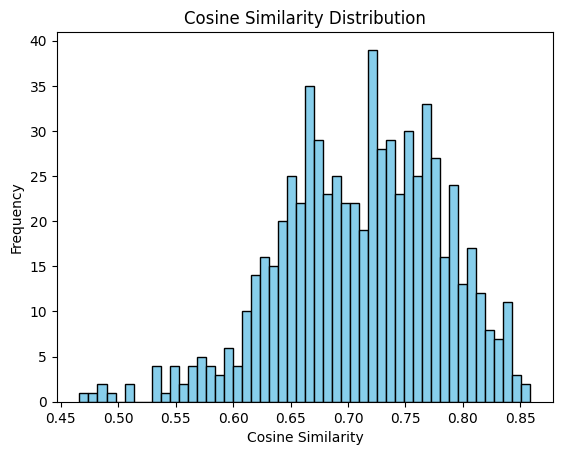

In [174]:
import matplotlib.pyplot as plt

# Visualize cosine similarity distribution
plt.hist(df_embeddings['Cosine Similarity'], bins=50, color='skyblue', edgecolor='black')
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

with preprocessing

In [164]:
print(df_embeddings['Cosine Similarity'].describe())

count    688.000000
mean       0.710993
std        0.070369
min        0.466304
25%        0.664001
50%        0.717983
75%        0.764800
max        0.858697
Name: Cosine Similarity, dtype: float64


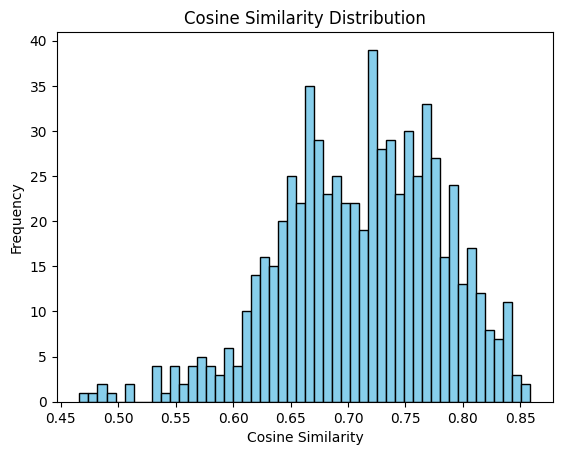

In [165]:
import matplotlib.pyplot as plt

# Visualize cosine similarity distribution
plt.hist(df_embeddings['Cosine Similarity'], bins=50, color='skyblue', edgecolor='black')
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [175]:
texts_fatwa = df_embeddings['Fatwa_Embedding'].tolist()
texts_quran_hadis = df_embeddings['Quran_Hadits_Embedding'].tolist()
labels = df_embeddings['Cosine Similarity'].tolist()

In [176]:
import torch.nn as nn
from torch.utils.data import Dataset

# Dataset untuk fine-tuning
class FineTuningDataset(Dataset):
    def __init__(self, texts_fatwa, texts_quran_hadis, labels, embedding_dim=768):
        self.texts_fatwa = texts_fatwa
        self.texts_quran_hadis = texts_quran_hadis
        self.labels = labels
        self.embedding_dim = embedding_dim

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Precomputed embeddings, no need for tokenization
        inputs_fatwa = torch.tensor(self.texts_fatwa[idx], dtype=torch.float)
        inputs_quran_hadis = torch.tensor(self.texts_quran_hadis[idx], dtype=torch.float)

        # Ensure the embeddings match the required dimension (768 for BERT)
        if inputs_fatwa.shape[0] != self.embedding_dim:
            inputs_fatwa = nn.Linear(inputs_fatwa.shape[0], self.embedding_dim).to(inputs_fatwa.device)(inputs_fatwa)

        if inputs_quran_hadis.shape[0] != self.embedding_dim:
            inputs_quran_hadis = nn.Linear(inputs_quran_hadis.shape[0], self.embedding_dim).to(inputs_quran_hadis.device)(inputs_quran_hadis)

        # Return embeddings directly (no need for input_ids or attention_mask)
        return {
            "input_ids": inputs_fatwa,
            "attention_mask": inputs_quran_hadis,
            "labels": torch.tensor(self.labels[idx], dtype=torch.float)
        }

# Membuat dataset dan dataloader
dataset = FineTuningDataset(texts_fatwa, texts_quran_hadis, labels)

In [177]:
from torch.utils.data import random_split

# Membagi dataset menjadi data train dan eval
train_size = int(0.8 * len(dataset))  # 80% data untuk pelatihan
eval_size = len(dataset) - train_size  # 20% data untuk evaluasi
train_dataset, eval_dataset = random_split(dataset, [train_size, eval_size])

In [178]:
from transformers import AdamW, AutoModel
from torch.utils.data import DataLoader

# DataLoader untuk train dan eval
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=8)

# Model kustom yang menerima embedding langsung
class CustomIndoBERTForRegression(nn.Module):
    def __init__(self, model_name="indobenchmark/indobert-base-p2", embedding_dim=768):
        super(CustomIndoBERTForRegression, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.regressor = nn.Linear(embedding_dim, 1)  # Untuk output regresi

    def forward(self, input_ids, attention_mask=None):
        # Mengubah input_ids ke bentuk yang sesuai, tambahkan dimensi seq_length=1
        input_ids = input_ids.unsqueeze(1)  # Menambahkan dimensi seq_length=1 (batch_size, 1, hidden_size)
        
        # Menggunakan embedding yang sudah dihitung (input_ids di sini adalah embedding)
        outputs = self.bert(inputs_embeds=input_ids)  # Menggunakan embeddings langsung
        pooled_output = outputs.pooler_output  # Output dari BERT
        regression_output = self.regressor(pooled_output)  # Pass ke regressor untuk tugas regresi
        return regression_output



In [179]:
model = CustomIndoBERTForRegression(embedding_dim=768).to(device)

In [180]:
# Mendefinisikan optimizer dan loss function
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.MSELoss()

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [181]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def compute_metrics(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = mse ** 0.5
    r2 = r2_score(true, predicted)
    return mse, mae, rmse, r2

In [182]:
# EarlyStopping callback untuk menghentikan pelatihan jika loss tidak membaik
class EarlyStopping:
    def __init__(self, patience=3, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_loss = None
        self.counter = 0
        self.best_weights = None

    def __call__(self, loss, model):
        if self.best_loss is None:
            self.best_loss = loss
            self.best_weights = model.state_dict()
        elif loss < self.best_loss - self.delta:
            self.best_loss = loss
            self.best_weights = model.state_dict()
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                if self.verbose:
                    print(f"Early stopping triggered. Best loss: {self.best_loss:.4f}")
                model.load_state_dict(self.best_weights)
                return True
        return False

# Menambahkan early stopping
early_stopping = EarlyStopping(patience=3, verbose=True)

Without Preprocessing

In [183]:
from tqdm import tqdm
# Loop pelatihan untuk 20 epoch
for epoch in range(20):  # 20 epochs
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1} Training"):
        optimizer.zero_grad()

        # Ambil input dan label
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.squeeze(-1)  # Membuat output bentuk scalar

        # Menghitung loss
        loss = criterion(logits, labels)
        total_loss += loss.item()

        # Backward pass dan update weights
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}: Training Loss: {total_loss / len(train_dataloader)}")

    # Evaluasi
    model.eval()
    eval_loss = 0
    all_true_labels = []
    all_predicted_labels = []

    with torch.no_grad():
        for batch in tqdm(eval_dataloader, desc=f"Epoch {epoch+1} Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.squeeze(-1)

            loss = criterion(logits, labels)
            eval_loss += loss.item()

            # Collect true and predicted labels for evaluation metrics
            all_true_labels.extend(labels.cpu().numpy())
            all_predicted_labels.extend(logits.cpu().numpy())

    # Calculate evaluation metrics
    mse, mae, rmse, r2 = compute_metrics(all_true_labels, all_predicted_labels)
    print(f"Epoch {epoch+1}: Evaluation Loss: {eval_loss / len(eval_dataloader)}")
    print(f"Epoch {epoch+1}: MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    # Check for early stopping
    if early_stopping(eval_loss / len(eval_dataloader), model):
        print("Early stopping triggered!")
        break  # Stop training if early stopping is triggered


Epoch 1 Training: 100%|██████████| 69/69 [00:05<00:00, 11.70it/s]


Epoch 1: Training Loss: 0.04021350330625917


Epoch 1 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 50.07it/s]


Epoch 1: Evaluation Loss: 0.007074571525057157
Epoch 1: MSE: 0.0073, MAE: 0.0665, RMSE: 0.0854, R2: -0.5761


Epoch 2 Training: 100%|██████████| 69/69 [00:05<00:00, 12.35it/s]


Epoch 2: Training Loss: 0.006966139623503862


Epoch 2 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 67.08it/s]


Epoch 2: Evaluation Loss: 0.0069211304653435946
Epoch 2: MSE: 0.0071, MAE: 0.0677, RMSE: 0.0845, R2: -0.5434


Epoch 3 Training: 100%|██████████| 69/69 [00:05<00:00, 13.19it/s]


Epoch 3: Training Loss: 0.005624702077129505


Epoch 3 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 69.02it/s]


Epoch 3: Evaluation Loss: 0.0043345973632919295
Epoch 3: MSE: 0.0043, MAE: 0.0522, RMSE: 0.0658, R2: 0.0645


Epoch 4 Training: 100%|██████████| 69/69 [00:05<00:00, 13.25it/s]


Epoch 4: Training Loss: 0.006762360647806655


Epoch 4 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 61.49it/s]


Epoch 4: Evaluation Loss: 0.019860329856682155
Epoch 4: MSE: 0.0204, MAE: 0.1286, RMSE: 0.1429, R2: -3.4184


Epoch 5 Training: 100%|██████████| 69/69 [00:05<00:00, 13.17it/s]


Epoch 5: Training Loss: 0.006687666746206494


Epoch 5 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 68.43it/s]


Epoch 5: Evaluation Loss: 0.004089974319665796
Epoch 5: MSE: 0.0041, MAE: 0.0512, RMSE: 0.0637, R2: 0.1218


Epoch 6 Training: 100%|██████████| 69/69 [00:05<00:00, 13.66it/s]


Epoch 6: Training Loss: 0.005713196307677182


Epoch 6 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 72.74it/s]


Epoch 6: Evaluation Loss: 0.004322790424339473
Epoch 6: MSE: 0.0044, MAE: 0.0527, RMSE: 0.0660, R2: 0.0582


Epoch 7 Training: 100%|██████████| 69/69 [00:05<00:00, 13.56it/s]


Epoch 7: Training Loss: 0.00599371973151827


Epoch 7 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 65.39it/s]


Epoch 7: Evaluation Loss: 0.005472935904334817
Epoch 7: MSE: 0.0054, MAE: 0.0572, RMSE: 0.0734, R2: -0.1662


Epoch 8 Training: 100%|██████████| 69/69 [00:05<00:00, 13.75it/s]


Epoch 8: Training Loss: 0.004998763759141329


Epoch 8 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 63.29it/s]

Epoch 8: Evaluation Loss: 0.007676803080054621
Epoch 8: MSE: 0.0079, MAE: 0.0683, RMSE: 0.0888, R2: -0.7070
Early stopping triggered. Best loss: 0.0041
Early stopping triggered!


With Preprocessing

In [14]:
from tqdm import tqdm
# Loop pelatihan untuk 20 epoch
for epoch in range(20):  # 20 epochs
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1} Training"):
        optimizer.zero_grad()

        # Ambil input dan label
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.squeeze(-1)  # Membuat output bentuk scalar

        # Menghitung loss
        loss = criterion(logits, labels)
        total_loss += loss.item()

        # Backward pass dan update weights
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}: Training Loss: {total_loss / len(train_dataloader)}")

    # Evaluasi
    model.eval()
    eval_loss = 0
    all_true_labels = []
    all_predicted_labels = []

    with torch.no_grad():
        for batch in tqdm(eval_dataloader, desc=f"Epoch {epoch+1} Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.squeeze(-1)

            loss = criterion(logits, labels)
            eval_loss += loss.item()

            # Collect true and predicted labels for evaluation metrics
            all_true_labels.extend(labels.cpu().numpy())
            all_predicted_labels.extend(logits.cpu().numpy())

    # Calculate evaluation metrics
    mse, mae, rmse, r2 = compute_metrics(all_true_labels, all_predicted_labels)
    print(f"Epoch {epoch+1}: Evaluation Loss: {eval_loss / len(eval_dataloader)}")
    print(f"Epoch {epoch+1}: MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    # Check for early stopping
    if early_stopping(eval_loss / len(eval_dataloader), model):
        print("Early stopping triggered!")
        break  # Stop training if early stopping is triggered


Epoch 1 Training: 100%|██████████| 69/69 [00:06<00:00, 10.63it/s]


Epoch 1: Training Loss: 0.02833862393838016


Epoch 1 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 61.48it/s]


Epoch 1: Evaluation Loss: 0.005931660623496605
Epoch 1: MSE: 0.0054, MAE: 0.0583, RMSE: 0.0737, R2: -0.1265


Epoch 2 Training: 100%|██████████| 69/69 [00:05<00:00, 13.06it/s]


Epoch 2: Training Loss: 0.007519013184271213


Epoch 2 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 60.96it/s]


Epoch 2: Evaluation Loss: 0.01008249612318145
Epoch 2: MSE: 0.0105, MAE: 0.0893, RMSE: 0.1022, R2: -1.1697


Epoch 3 Training: 100%|██████████| 69/69 [00:05<00:00, 13.09it/s]


Epoch 3: Training Loss: 0.005683217825287063


Epoch 3 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 68.41it/s]


Epoch 3: Evaluation Loss: 0.0041678085431663525
Epoch 3: MSE: 0.0038, MAE: 0.0499, RMSE: 0.0619, R2: 0.2060


Epoch 4 Training: 100%|██████████| 69/69 [00:05<00:00, 13.12it/s]


Epoch 4: Training Loss: 0.0054428015525142355


Epoch 4 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 73.04it/s]


Epoch 4: Evaluation Loss: 0.004238858974228303
Epoch 4: MSE: 0.0039, MAE: 0.0505, RMSE: 0.0626, R2: 0.1858


Epoch 5 Training: 100%|██████████| 69/69 [00:05<00:00, 13.24it/s]


Epoch 5: Training Loss: 0.00549152695938297


Epoch 5 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 71.47it/s]


Epoch 5: Evaluation Loss: 0.00380122381547052
Epoch 5: MSE: 0.0037, MAE: 0.0503, RMSE: 0.0610, R2: 0.2288


Epoch 6 Training: 100%|██████████| 69/69 [00:05<00:00, 12.79it/s]


Epoch 6: Training Loss: 0.0050242914382935214


Epoch 6 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 63.61it/s]


Epoch 6: Evaluation Loss: 0.004155687366922696
Epoch 6: MSE: 0.0038, MAE: 0.0502, RMSE: 0.0618, R2: 0.2065


Epoch 7 Training: 100%|██████████| 69/69 [00:05<00:00, 13.05it/s]


Epoch 7: Training Loss: 0.004952669380725348


Epoch 7 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 66.17it/s]


Epoch 7: Evaluation Loss: 0.006659995764493942
Epoch 7: MSE: 0.0061, MAE: 0.0626, RMSE: 0.0783, R2: -0.2722


Epoch 8 Training: 100%|██████████| 69/69 [00:05<00:00, 13.15it/s]


Epoch 8: Training Loss: 0.004889567334549097


Epoch 8 Evaluation: 100%|██████████| 18/18 [00:00<00:00, 63.89it/s]

Epoch 8: Evaluation Loss: 0.005681347451172769
Epoch 8: MSE: 0.0052, MAE: 0.0566, RMSE: 0.0719, R2: -0.0744
Early stopping triggered. Best loss: 0.0038
Early stopping triggered!


In [184]:
import torch

# Menyimpan model dengan bobot dan arsitektur
# torch.save(model, 'indobert_regression_complete.pth')
torch.save(model, 'indobert_regression_complete_without_preprocessing.pth')

# torch.save(model.state_dict(), "indobert_regression_complete_without_preprocessing.pth")

Menggunakan Model yang telah Fine-Tuned (IndoBERT)

In [30]:
import os
import pandas as pd

# Ganti dengan path lengkap file CSV Anda
hadits_path = os.path.join(os.getcwd(), 'Al-Hadits ~ Bahasa Indonesia.csv')
quran_path = os.path.join(os.getcwd(), 'Al-Quran ~ Bahasa Indonesia.csv')
fatwa_path = os.path.join(os.getcwd(), 'Fatwa ~ Bahasa Indonesia.csv')

# Membaca file CSV ke dalam DataFrame
df_hadits = pd.read_csv(hadits_path)
df_quran = pd.read_csv(quran_path)
df_fatwa = pd.read_csv(fatwa_path)

In [31]:
# Ganti dengan path lengkap file CSV Anda
df_quran_embeddings = os.path.join(os.getcwd(), 'quran_embeddings.csv')

# Membaca file CSV ke dalam DataFrame
df_quran_embeddings = pd.read_csv(df_quran_embeddings)

In [32]:
# Ganti dengan path lengkap file CSV Anda
df_hadits_embeddings = os.path.join(os.getcwd(), 'hadits_embeddings.csv')

# Membaca file CSV ke dalam DataFrame
df_hadits_embeddings = pd.read_csv(df_hadits_embeddings)

In [33]:
df_quran_embeddings.head()

Quran_Embedding_0  Quran_Embedding_1  Quran_Embedding_2  Quran_Embedding_3  \
0          -0.442408           1.071785           0.343306           0.221316   
1          -0.955182           0.825697           1.538453           0.606960   
2          -0.506569           1.465344           0.386168           0.718916   
3           0.171521           1.689182           0.062098           0.937123   
4          -0.675455           1.469190           0.907292           0.167592   

   Quran_Embedding_4  Quran_Embedding_5  Quran_Embedding_6  Quran_Embedding_7  \
0           1.403720           0.421871          -0.449680          -0.558463   
1           1.493330          -0.712607          -1.102654           0.050608   
2           1.415598           0.730807          -0.218995           0.050652   
3           2.421658          -0.224557          -0.499737          -0.356586   
4           1.426781           0.607102          -0.334743          -1.128559   

   Quran_Embedding_8  Quran_Embedding_9  ...  Quran_Embedding_758  \
0           1.033083           0.154543  ...            -0.142132   
1           1.082383          -0.168128  ...             0.151283   
2           1.380225           0.489469  ...             0.351900   
3           1.658606           0.273957  ...             0.848348   
4           0.779876           1.030848  ...             0.302521   

   Quran_Embedding_759  Quran_Embedding_760  Quran_Embedding_761  \
0            -0.654280             0.508781             0.337335   
1             0.127443             0.025708            -0.202195   
2            -0.809400             0.159665             0.475853   
3             0.839523            -0.653276             0.940062   
4             0.409897             0.130580             0.601986   

   Quran_Embedding_762  Quran_Embedding_763  Quran_Embedding_764  \
0             0.747394             0.350796             0.334403   
1             0.348954             1.251078             0.316491   
2             1.130215             0.477078             0.427654   
3             1.026294            -0.763361             0.048648   
4             0.659625             0.364315            -0.049152   

   Quran_Embedding_765  Quran_Embedding_766  Quran_Embedding_767  
0             0.861431             0.131723            -0.237661  
1             1.336858            -0.118646             0.480100  
2             1.271464             0.242319            -0.438648  
3             1.549514             0.861524            -0.897254  
4             1.736437             0.513971            -0.172942  

[5 rows x 768 columns]

In [34]:
df_hadits_embeddings.head()

Hadits_Embedding_0  Hadits_Embedding_1  Hadits_Embedding_2  \
0           -0.157211            0.396791            0.002842   
1           -0.099317            0.298202           -0.130231   
2            0.467435            0.911553           -0.260820   
3           -0.349822            0.897864           -0.270782   
4           -0.244078            0.430082            0.078161   

   Hadits_Embedding_3  Hadits_Embedding_4  Hadits_Embedding_5  \
0            0.291738           -0.482014           -0.352786   
1            0.116626           -0.570674           -0.377413   
2            0.010352            0.072666           -0.039367   
3           -0.071483            0.314954           -0.202811   
4           -0.116784            0.764205            0.104099   

   Hadits_Embedding_6  Hadits_Embedding_7  Hadits_Embedding_8  \
0           -0.925229            0.253351           -0.520767   
1           -0.201399            0.165209           -0.192951   
2           -1.221732            1.063006            0.310752   
3           -1.128655            0.464254            0.306561   
4           -0.981824            0.942235            0.434550   

   Hadits_Embedding_9  ...  Hadits_Embedding_758  Hadits_Embedding_759  \
0           -0.149424  ...             -0.192612             -0.516651   
1           -0.246181  ...             -0.011354              0.036222   
2           -0.741700  ...             -0.447645              0.238819   
3           -0.217835  ...              0.215805              0.036441   
4           -0.318713  ...             -0.233575             -0.123149   

   Hadits_Embedding_760  Hadits_Embedding_761  Hadits_Embedding_762  \
0             -0.056729              1.289830             -0.108715   
1             -0.367577              1.256415              0.320850   
2             -0.139353              1.414961              0.617125   
3              0.120372              0.736808             -0.891231   
4              0.014774              1.060546              0.267114   

   Hadits_Embedding_763  Hadits_Embedding_764  Hadits_Embedding_765  \
0              1.043031              0.706234              0.151012   
1              0.775800              0.697830              0.220810   
2              0.273745              0.573913              0.060197   
3              0.326499              0.476993              0.320509   
4              0.840363              0.385147              0.660638   

   Hadits_Embedding_766  Hadits_Embedding_767  
0             -0.229039             -0.558605  
1              0.209040             -0.684525  
2             -0.229147             -1.166108  
3             -0.198356             -0.976616  
4              0.328936             -1.059332  

[5 rows x 768 columns]

In [35]:
# Ganti dengan path lengkap file CSV Anda
df_quran_embeddings = os.path.join(os.getcwd(), 'quran_embeddings.csv')

# Membaca file CSV ke dalam DataFrame
df_quran_embeddings = pd.read_csv(df_quran_embeddings)

# Menyatukan kolom Quran_Embedding_n ke dalam satu kolom quran_embeddings sebagai list
embedding_columns = [col for col in df_quran_embeddings.columns if col.startswith('Quran_Embedding_')]
df_quran_embeddings['quran_embeddings'] = df_quran_embeddings[embedding_columns].values.tolist()

# Menghapus kolom-kolom asli jika tidak diperlukan lagi
df_quran_embeddings.drop(columns=embedding_columns, inplace=True)

In [36]:
# Ganti dengan path lengkap file CSV Anda
df_hadits_embeddings = os.path.join(os.getcwd(), 'hadits_embeddings.csv')

# Membaca file CSV ke dalam DataFrame
df_hadits_embeddings = pd.read_csv(df_hadits_embeddings)

# Menyatukan kolom Quran_Embedding_n ke dalam satu kolom quran_embeddings sebagai list
embedding_columns = [col for col in df_hadits_embeddings.columns if col.startswith('Hadits_Embedding_')]
df_hadits_embeddings['hadits_embeddings'] = df_hadits_embeddings[embedding_columns].values.tolist()

# Menghapus kolom-kolom asli jika tidak diperlukan lagi
df_hadits_embeddings.drop(columns=embedding_columns, inplace=True)

In [37]:
df_quran_embeddings

quran_embeddings
0     [-0.4424076378345489, 1.0717854499816897, 0.34...
1     [-0.9551824331283568, 0.825697124004364, 1.538...
2     [-0.5065692067146301, 1.4653441905975342, 0.38...
3     [0.17152139544487, 1.689182162284851, 0.062098...
4     [-0.6754551529884338, 1.4691895246505735, 0.90...
...                                                 ...
6231  [-0.39581960439682, 1.132571816444397, 0.42858...
6232  [-0.1711451262235641, 0.7473198771476746, 0.53...
6233  [0.7450589537620544, 0.8913952708244324, -0.00...
6234  [0.4145357608795166, 0.9159054160118104, 0.066...
6235  [-0.5967978239059448, 0.0003937397559639, 0.13...

[6236 rows x 1 columns]

In [38]:
df_hadits_embeddings

hadits_embeddings
0      [-0.1572113335132599, 0.3967912495136261, 0.00...
1      [-0.0993170887231826, 0.2982016801834106, -0.1...
2      [0.4674349129199981, 0.911553144454956, -0.260...
3      [-0.3498216867446899, 0.8978636264801025, -0.2...
4      [-0.2440782785415649, 0.4300823509693146, 0.07...
...                                                  ...
37627  [-0.2554178833961487, 0.6133628487586975, -0.7...
37628  [-0.3845503032207489, 0.9802373051643372, -0.5...
37629  [-0.3184354305267334, 0.9622027277946472, -0.2...
37630  [-0.215541198849678, 0.5564648509025574, -0.20...
37631  [-0.3262080550193786, 0.2671797573566437, -0.3...

[37632 rows x 1 columns]

with preprocessing

In [ ]:
from transformers import AutoModel
import torch.nn as nn

# Model kustom yang menerima embedding langsung
class CustomIndoBERTForRegression(nn.Module):
    def __init__(self, model_name="indobenchmark/indobert-base-p2", embedding_dim=768):
        super(CustomIndoBERTForRegression, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.regressor = nn.Linear(embedding_dim, 1)  # Untuk output regresi

    def forward(self, input_ids, attention_mask=None):
        # Mengubah input_ids ke bentuk yang sesuai, tambahkan dimensi seq_length=1
        input_ids = input_ids.unsqueeze(1)  # Menambahkan dimensi seq_length=1 (batch_size, 1, hidden_size)
        
        # Menggunakan embedding yang sudah dihitung (input_ids di sini adalah embedding)
        outputs = self.bert(inputs_embeds=input_ids)  # Menggunakan embeddings langsung
        pooled_output = outputs.pooler_output  # Output dari BERT
        regression_output = self.regressor(pooled_output)  # Pass ke regressor untuk tugas regresi
        return regression_output

without preprocessing

In [ ]:
from transformers import AutoModel
import torch.nn as nn

# Model kustom yang menerima embedding langsung
class CustomIndoBERTForRegression(nn.Module):
    def __init__(self, model_name="indobenchmark/indobert-base-p2", embedding_dim=768):
        super(CustomIndoBERTForRegression, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.regressor = nn.Linear(embedding_dim, 1)  # Untuk output regresi

    def forward(self, input_ids, attention_mask=None):
        # Menggunakan embedding yang sudah dihitung (input_ids di sini adalah embedding)
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, return_dict=True)
        pooled_output = outputs.pooler_output
        regression_output = self.regressor(pooled_output)  # Pass ke regressor untuk tugas regresi
        return regression_output

In [39]:
import torch
from transformers import AutoModel

# Memastikan perangkat (GPU) yang tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Memuat model dengan bobot dan arsitektur
# model = torch.load('indobert_regression_complete.pth').to(device)
# model = torch.load('indobert_regression_complete_without_preprocessing.pth').to(device)

# model.eval()  # Menempatkan model dalam mode evaluasi

model = AutoModel.from_pretrained("indobenchmark/indobert-base-p2").to(device)

In [40]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

# Inisialisasi stemmer dari Sastrawi
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# Menggunakan stopwords Bahasa Indonesia dari NLTK
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Fungsi untuk preprocessing teks
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus semua karakter non-huruf dan non-angka

    # Menghapus spasi ekstra (spasi ganda atau spasi di awal/akhir)
    text = re.sub(r'\s+', ' ', text)  # Mengganti spasi ganda dengan satu spasi
    text = text.strip()  # Menghapus spasi di awal dan akhir teks

    # Menghapus stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])

    # Stemming: Mengembalikan kata ke bentuk dasar menggunakan Sastrawi
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text

Model Setelah di Fine Tune

With Preprocessing

In [26]:
from transformers import AutoTokenizer
from scipy.spatial.distance import cosine
import numpy as np

# Memuat tokenizer yang sesuai
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Ambil input fatwa dari pengguna
fatwa_new = input("Masukkan fatwa baru untuk dicari keselarasan dengan Al-Quran dan Hadits: ")

# Lakukan preprocessing pada fatwa baru
preprocessed_fatwa = preprocess_text(fatwa_new)

# Tokenisasi fatwa
inputs = tokenizer(preprocessed_fatwa, return_tensors='pt', padding=True, truncation=True, max_length=512)

# Memindahkan input tensor ke perangkat (GPU) yang sama dengan model
inputs = {key: value.to(device) for key, value in inputs.items()}

# Jika token_type_ids tidak diperlukan, bisa menghapusnya
inputs.pop('token_type_ids', None)

# Menggunakan model untuk menghasilkan embeddings
with torch.no_grad():
    # Menambahkan return_dict=True agar output lebih terstruktur
    outputs = model.bert(**inputs, return_dict=True)
    fatwa_embedding = outputs.pooler_output.squeeze().cpu().numpy()  # Mengambil output [CLS] token sebagai embedding

# Fungsi untuk mengonversi embedding menjadi numpy array
def convert_to_array(x):
    if isinstance(x, list):  # Jika x sudah berupa list
        return np.array(x)  # Langsung konversi ke numpy array
    else:
        return np.array([])  # Mengembalikan array kosong jika tipe lain

# Membuat list dari vektor embedding Quran dan Hadits (dalam bentuk numpy array)
quran_embeddings = df_quran_embeddings['quran_embeddings'].apply(convert_to_array)
hadits_embeddings = df_hadits_embeddings['hadits_embeddings'].apply(convert_to_array)

# Menghitung cosine similarity antara fatwa dan setiap embedding Quran
cosine_similarities_quran = []
for quran_embedding in quran_embeddings:
    similarity = 1 - cosine(fatwa_embedding, quran_embedding)
    cosine_similarities_quran.append(similarity)

# Menghitung cosine similarity antara fatwa dan setiap embedding Hadits
cosine_similarities_hadits = []
for hadits_embedding in hadits_embeddings:
    similarity = 1 - cosine(fatwa_embedding, hadits_embedding)
    cosine_similarities_hadits.append(similarity)

# Mencari index dengan cosine similarity tertinggi untuk Quran
max_quran_similarity_idx = np.argmax(cosine_similarities_quran)
# print(cosine_similarities_quran)
max_quran_similarity = cosine_similarities_quran[max_quran_similarity_idx]
best_quran_reference = df_quran.iloc[max_quran_similarity_idx]['Terjemahan Indonesia']

# Mencari index dengan cosine similarity tertinggi untuk Hadits
max_hadits_similarity_idx = np.argmax(cosine_similarities_hadits)
# print(cosine_similarities_hadits)
max_hadits_similarity = cosine_similarities_hadits[max_hadits_similarity_idx]
best_hadits_reference = df_hadits.iloc[max_hadits_similarity_idx]['Terjemahan Indonesia']

print("Fatwa:", fatwa_new)

print()

print(f"Max cosine similarity with Quran: {max_quran_similarity}")
print(f"Best Quran reference: {best_quran_reference} QS {df_quran.iloc[max_quran_similarity_idx]['Surah']} ayat {df_quran.iloc[max_quran_similarity_idx]['Ayat ke-']}")

print()

print(f"Max cosine similarity with Hadith: {max_hadits_similarity}")
print(f"Best Hadith reference: {best_hadits_reference} pada hadits riwayat {df_hadits.iloc[max_hadits_similarity_idx]['Riwayat']} No.{df_hadits.iloc[max_hadits_similarity_idx]['Nomor Hadits']}")

Fatwa: Makan daging babi diharamkan dalam Islam berdasarkan dalil-dalil dari Al-Qur'an dan Hadis. Dalam Al-Qur'an, Allah berfirman: 'Sesungguhnya Allah hanya mengharamkan bagimu bangkai, darah, daging babi, dan apa yang disembelih dengan menyebut nama selain Allah...' (QS. Al-Baqarah: 173).

Max cosine similarity with Quran: 0.07229498954076341
Best Quran reference: Sesungguhnya Kami (mulai menurunkannya pada malam yang diberkahi (Lailatulqadar). Sesungguhnya Kamilah pemberi peringatan. QS Ad-Dukhan ayat 3

Max cosine similarity with Hadith: 0.03466514419720235
Best Hadith reference: Telah bercerita kepada kami [Musa bin Dawud] telah bercerita kepada kami [Ibnu Lahi'ah] dari [Yazid bin Abu Habib] dari [Abu Al Khair] dari [Ash Shunabihi] dari [Bilal] nabi Shallalahu 'alaihi wa sallam bersabda: "Lailatul qadar adalah malam keduapuluh empat." pada hadits riwayat Ahmad No.22765


Model sebelum di fine tune

With Preprocessing

In [43]:
from transformers import AutoTokenizer
from scipy.spatial.distance import cosine
import numpy as np

# Memuat tokenizer yang sesuai
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Ambil input fatwa dari pengguna
fatwa_new = input("Masukkan fatwa baru untuk dicari keselarasan dengan Al-Quran dan Hadits: ")

# Lakukan preprocessing pada fatwa baru
preprocessed_fatwa = preprocess_text(fatwa_new)

# Tokenisasi fatwa
inputs = tokenizer(preprocessed_fatwa, return_tensors='pt', padding=True, truncation=True, max_length=512)

# Memindahkan input tensor ke perangkat (GPU) yang sama dengan model
inputs = {key: value.to(device) for key, value in inputs.items()}

# Jika token_type_ids tidak diperlukan, bisa menghapusnya
inputs.pop('token_type_ids', None)

# Menggunakan model untuk menghasilkan embeddings
with torch.no_grad():
    # Menambahkan return_dict=True agar output lebih terstruktur
    outputs = model(**inputs)
fatwa_embedding = outputs.last_hidden_state.mean(dim=1)

# Fungsi untuk mengonversi embedding menjadi numpy array
def convert_to_array(x):
    if isinstance(x, list):  # Jika x sudah berupa list
        return np.array(x)  # Langsung konversi ke numpy array
    else:
        return np.array([])  # Mengembalikan array kosong jika tipe lain
    
fatwa_embedding_cpu = fatwa_embedding.cpu().numpy().flatten()

# Membuat list dari vektor embedding Quran dan Hadits (dalam bentuk numpy array)
quran_embeddings = df_quran_embeddings['quran_embeddings'].apply(convert_to_array)
hadits_embeddings = df_hadits_embeddings['hadits_embeddings'].apply(convert_to_array)

# Menghitung cosine similarity antara fatwa dan setiap embedding Quran
cosine_similarities_quran = []
for quran_embedding in quran_embeddings:
    similarity = 1 - cosine(fatwa_embedding_cpu, quran_embedding)
    cosine_similarities_quran.append(similarity)

# Menghitung cosine similarity antara fatwa dan setiap embedding Hadits
cosine_similarities_hadits = []
for hadits_embedding in hadits_embeddings:
    similarity = 1 - cosine(fatwa_embedding_cpu, hadits_embedding)
    cosine_similarities_hadits.append(similarity)

# Mencari index dengan cosine similarity tertinggi untuk Quran
max_quran_similarity_idx = np.argmax(cosine_similarities_quran)
# print(cosine_similarities_quran)
max_quran_similarity = cosine_similarities_quran[max_quran_similarity_idx]
best_quran_reference = df_quran.iloc[max_quran_similarity_idx]['Terjemahan Indonesia']

# Mencari index dengan cosine similarity tertinggi untuk Hadits
max_hadits_similarity_idx = np.argmax(cosine_similarities_hadits)
# print(cosine_similarities_hadits)
max_hadits_similarity = cosine_similarities_hadits[max_hadits_similarity_idx]
best_hadits_reference = df_hadits.iloc[max_hadits_similarity_idx]['Terjemahan Indonesia']

# Menambahkan kondisi untuk memberikan label "Selaras" atau "Tidak Selaras"
def check_similarity_label(similarity_score):
    if similarity_score > 0.8:
        return "Selaras"
    else:
        return "Tidak Selaras"

# Menambahkan label pada hasil cosine similarity dengan Al-Quran
quran_similarity_label = check_similarity_label(max_quran_similarity)

# Menambahkan label pada hasil cosine similarity dengan Hadits
hadits_similarity_label = check_similarity_label(max_hadits_similarity)

print("Fatwa:", fatwa_new)

print()

print(f"Max cosine similarity with Quran: {max_quran_similarity} ({quran_similarity_label})")
print(f"Best Quran reference: {best_quran_reference} QS {df_quran.iloc[max_quran_similarity_idx]['Surah']} ayat {df_quran.iloc[max_quran_similarity_idx]['Ayat ke-']}")

print()

print(f"Max cosine similarity with Hadith: {max_hadits_similarity} ({hadits_similarity_label})")
print(f"Best Hadith reference: {best_hadits_reference} pada hadits riwayat {df_hadits.iloc[max_hadits_similarity_idx]['Riwayat']} No.{df_hadits.iloc[max_hadits_similarity_idx]['Nomor Hadits']}")

Fatwa: Makan daging babi diharamkan dalam Islam berdasarkan dalil-dalil dari Al-Qur'an dan Hadis. Dalam Al-Qur'an, Allah berfirman: 'Sesungguhnya Allah hanya mengharamkan bagimu bangkai, darah, daging babi, dan apa yang disembelih dengan menyebut nama selain Allah...' (QS. Al-Baqarah: 173).

Max cosine similarity with Quran: 0.8373818261110799 (Selaras)
Best Quran reference: Sesungguhnya Allah hanya mengharamkan atasmu bangkai, darah, daging babi, dan (hewan) yang disembelih dengan (menyebut nama) selain Allah. Akan tetapi, siapa yang terpaksa (memakannya) bukan karena menginginkan dan tidak (pula) melampaui batas, sesungguhnya Allah Maha Pengampun lagi Maha Penyayang. QS An-Nahl ayat 115

Max cosine similarity with Hadith: 0.7492722389301953 (Tidak Selaras)
Best Hadith reference: Telah menceritakan kepada kami [Abdullah Bin Numair] dia berkata; telah mengabarkan kepada kami [Isma'il] dari [Qais] dia berkata; [Abu Bakar] berdiri lalu memuji Allah dan mensucikan-Nya kemudian berkata; wa

Without Preprocessing Sesudah Fine Tune

In [228]:
from transformers import AutoTokenizer
from scipy.spatial.distance import cosine

# Memuat tokenizer yang sesuai
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

# Ambil input fatwa dari pengguna
fatwa_new = input("Masukkan fatwa baru untuk dicari keselarasan dengan Al-Quran dan Hadits: ")

# Lakukan preprocessing pada fatwa baru
preprocessed_fatwa = preprocess_text(fatwa_new)

# Tokenisasi fatwa
inputs = tokenizer(preprocessed_fatwa, return_tensors='pt', padding=True, truncation=True, max_length=512)

# Memindahkan input tensor ke perangkat (GPU) yang sama dengan model
inputs = {key: value.to(device) for key, value in inputs.items()}

# Jika token_type_ids tidak diperlukan, bisa menghapusnya
inputs.pop('token_type_ids', None)

# Ensure the shape is correct (batch_size, seq_length)
# print(f"Input ids shape: {inputs['input_ids'].shape}")

# Menggunakan model untuk menghasilkan embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Jika outputs adalah tuple, ambil elemen pertama (last_hidden_state)
if isinstance(outputs, tuple):
    fatwa_embedding = outputs[0].mean(dim=1)  # Mengambil rata-rata dari last_hidden_state
else:
    fatwa_embedding = outputs.mean(dim=1)  # Jika output langsung tensor

# Fungsi untuk mengonversi embedding menjadi numpy array
def convert_to_array(x):
    if isinstance(x, list):  # Jika x sudah berupa list
        return np.array(x)  # Langsung konversi ke numpy array
    else:
        return np.array([])  # Mengembalikan array kosong jika tipe lain
    
fatwa_embedding_cpu = fatwa_embedding.cpu().numpy().flatten()

# Membuat list dari vektor embedding Quran dan Hadits (dalam bentuk numpy array)
quran_embeddings = df_quran_embeddings['quran_embeddings'].apply(convert_to_array)
hadits_embeddings = df_hadits_embeddings['hadits_embeddings'].apply(convert_to_array)

# Menghitung cosine similarity antara fatwa dan setiap embedding Quran
cosine_similarities_quran = []
for quran_embedding in quran_embeddings:
    similarity = 1 - cosine(fatwa_embedding_cpu, quran_embedding)
    cosine_similarities_quran.append(similarity)

# Menghitung cosine similarity antara fatwa dan setiap embedding Hadits
cosine_similarities_hadits = []
for hadits_embedding in hadits_embeddings:
    similarity = 1 - cosine(fatwa_embedding_cpu, hadits_embedding)
    cosine_similarities_hadits.append(similarity)

# Mencari index dengan cosine similarity tertinggi untuk Quran
max_quran_similarity_idx = np.argmax(cosine_similarities_quran)
# print(cosine_similarities_quran)
max_quran_similarity = cosine_similarities_quran[max_quran_similarity_idx]
best_quran_reference = df_quran.iloc[max_quran_similarity_idx]['Terjemahan Indonesia']

# Mencari index dengan cosine similarity tertinggi untuk Hadits
max_hadits_similarity_idx = np.argmax(cosine_similarities_hadits)
# print(cosine_similarities_hadits)
max_hadits_similarity = cosine_similarities_hadits[max_hadits_similarity_idx]
best_hadits_reference = df_hadits.iloc[max_hadits_similarity_idx]['Terjemahan Indonesia']

print("Fatwa:", fatwa_new)

print()

print(f"Max cosine similarity with Quran: {max_quran_similarity}")
print(f"Best Quran reference: {best_quran_reference} QS {df_quran.iloc[max_quran_similarity_idx]['Surah']} ayat {df_quran.iloc[max_quran_similarity_idx]['Ayat ke-']}")

print()

print(f"Max cosine similarity with Hadith: {max_hadits_similarity}")
print(f"Best Hadith reference: {best_hadits_reference} pada hadits riwayat {df_hadits.iloc[max_hadits_similarity_idx]['Riwayat']} No.{df_hadits.iloc[max_hadits_similarity_idx]['Nomor Hadits']}")

Fatwa: Makan daging babi diharamkan dalam Islam berdasarkan dalil-dalil dari Al-Qur'an dan Hadis. Dalam Al-Qur'an, Allah berfirman: 'Sesungguhnya Allah hanya mengharamkan bagimu bangkai, darah, daging babi, dan apa yang disembelih dengan menyebut nama selain Allah...' (QS. Al-Baqarah: 173). 

Max cosine similarity with Quran: 0.0017036270658239427
Best Quran reference: Mereka berkata, “Wahai al-Aziz, sesungguhnya dia (Bunyamin) mempunyai ayah yang sudah lanjut usia karena itu ambillah salah seorang di antara kami sebagai gantinya. Sesungguhnya kami melihat engkau termasuk orang-orang yang selalu berbuat lebih baik.” QS Yusuf ayat 78

Max cosine similarity with Hadith: 0.001747156725079524
Best Hadith reference: Telah menceritakan kepada kami [Waki'] telah menceritakan kepada kami [Sufyan] dari [Abu Hasyim, Isma'il bin Katsir] dari ['Ashim bin Laqith bin Shabirah] dari [bapaknya] berkata, saya menemui Nabi Shallallahu'alaihiwasallam lalu menyembelih kambing untuk kami dan bersabda: "Ngg

LSTM

In [1]:
import pandas as pd

In [2]:
# Ganti dengan path lengkap file CSV Anda
# df_embeddings = pd.read_pickle('top_688_fatwa_quran_hadits.pkl')
df_embeddings = pd.read_pickle('top_688_fatwa_quran_hadits_without_preprocessing.pkl')

texts_fatwa = df_embeddings['Fatwa_Embedding'].tolist()
texts_quran_hadis = df_embeddings['Quran_Hadits_Embedding'].tolist()
labels = df_embeddings['Cosine Similarity'].tolist()

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.1
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# Convert embeddings and labels to numpy arrays
X_fatwa = np.array(texts_fatwa, dtype=np.float32)
X_quran_hadis = np.array(texts_quran_hadis, dtype=np.float32)
y = np.array(labels, dtype=np.float32)

# Combine embeddings as input for LSTM
X = np.concatenate([X_fatwa, X_quran_hadis], axis=1)  # Shape: (n_samples, 2 * embedding_dim)

# Reshape for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], 2, -1)  # Here, 2 is the timesteps (Fatwa and Quran/Hadith)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # type: ignore

# EarlyStopping untuk menghentikan pelatihan ketika tidak ada peningkatan di val_loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint untuk menyimpan model dengan val_loss terbaik
checkpoint = ModelCheckpoint('best_model_lstm_without_preprocessing.h5', monitor='val_loss', save_best_only=True, 
                             verbose=1)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])

Without Preprocessing

In [8]:
# Train the model with callbacks
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping, checkpoint])  # Include callbacks in the fit function

Epoch 1/20
10/14 [====================>.........] - ETA: 0s - loss: 0.1338 - mean_squared_error: 0.1338
Epoch 1: val_loss improved from inf to 0.03336, saving model to best_model_lstm_without_preprocessing.h5
14/14 [==============================] - 5s 43ms/step - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 2/20
13/14 [==========================>...] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 2: val_loss improved from 0.03336 to 0.01294, saving model to best_model_lstm_without_preprocessing.h5
14/14 [==============================] - 0s 16ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 3/20
12/14 [========================>.....] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 3: val_loss improved from 0.01294 to 0.00716, saving model to best_model_lstm_without_preprocessing.h5
14/14 [==============================] - 0s 16ms/step - loss: 0.0

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score
# Evaluate the model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

5/5 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.0029
Mean Absolute Error (MAE): 0.0398
Root Mean Squared Error (RMSE): 0.0535
R-squared (R²): 0.3210


With Preprocessing

In [45]:
# Train the model with callbacks
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping, checkpoint])  # Include callbacks in the fit function

Epoch 1/20
11/14 [======================>.......] - ETA: 0s - loss: 0.0815 - mean_squared_error: 0.0815
Epoch 1: val_loss improved from inf to 0.02219, saving model to best_model_lstm.h5
14/14 [==============================] - 2s 44ms/step - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 2/20
12/14 [========================>.....] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 2: val_loss improved from 0.02219 to 0.00656, saving model to best_model_lstm.h5
14/14 [==============================] - 0s 17ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 3/20
12/14 [========================>.....] - ETA: 0s - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 3: val_loss improved from 0.00656 to 0.00438, saving model to best_model_lstm.h5
14/14 [==============================] - 0s 17ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0044 - val_mean_squ

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score
# Evaluate the model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

5/5 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.0032
Mean Absolute Error (MAE): 0.0424
Root Mean Squared Error (RMSE): 0.0568
R-squared (R²): 0.2343


Hasil Visualisasi Training

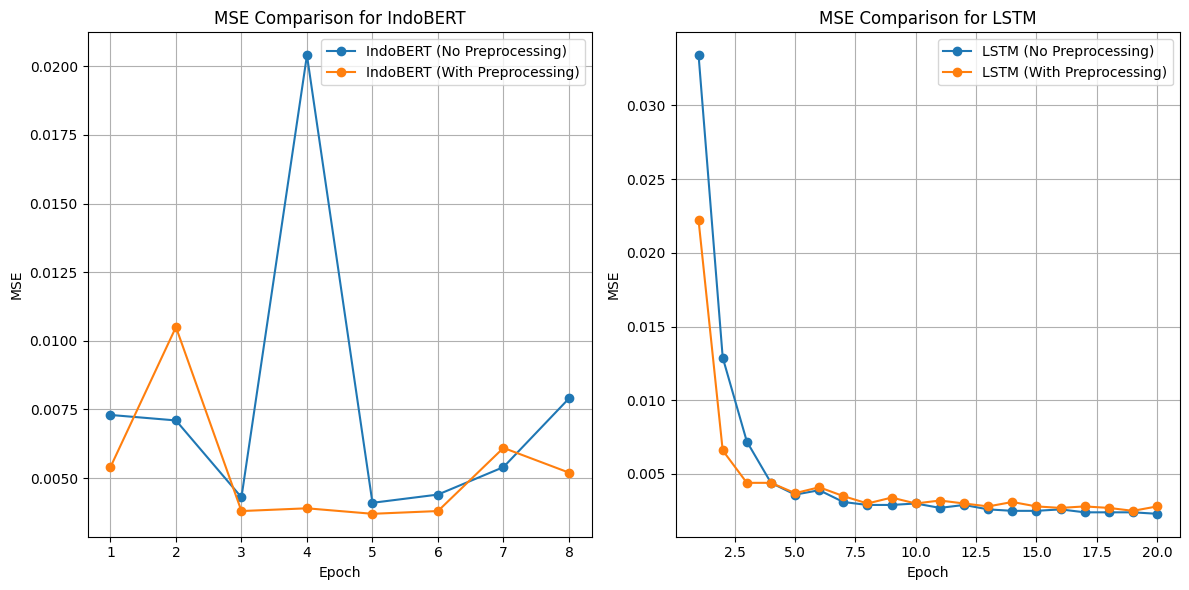

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy data (ganti dengan data asli Anda)
epochs_indobert = np.arange(1, 9)  # 8 epoch untuk IndoBERT
epochs_lstm = np.arange(1, 21)  # 20 epoch untuk LSTM

# Data untuk IndoBERT (8 epoch)
indobert_mse_no_pre = [0.0073, 0.0071, 0.0043, 0.0204, 0.0041, 0.0044, 0.0054, 0.0079]
indobert_mse_pre = [0.0054, 0.0105, 0.0038, 0.0039, 0.0037, 0.0038, 0.0061, 0.0052]

# Data untuk LSTM (20 epoch)
lstm_mse_no_pre = [0.0334, 0.0129, 0.0072, 0.0044, 0.0036, 0.0039, 0.0031, 0.0029, 0.0029, 0.0030, 0.0027, 0.0029, 0.0026, 0.0025, 0.0025, 0.0026, 0.0024, 0.0024, 0.0024, 0.0023]
lstm_mse_pre = [0.0222, 0.0066, 0.0044, 0.0044, 0.0037, 0.0041, 0.0035, 0.0030, 0.0034, 0.0030, 0.0032, 0.0030, 0.0028, 0.0031, 0.0028, 0.0027, 0.0028, 0.0027, 0.0025, 0.0028]

# 1. Line chart: Perbandingan MSE IndoBERT dan LSTM di seluruh epoch

# Membuat subplot untuk MSE IndoBERT
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Membuat subplot untuk IndoBERT
plt.plot(epochs_indobert, indobert_mse_no_pre, label='IndoBERT (No Preprocessing)', marker='o')
plt.plot(epochs_indobert, indobert_mse_pre, label='IndoBERT (With Preprocessing)', marker='o')
plt.title('MSE Comparison for IndoBERT')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid()

# Membuat subplot untuk MSE LSTM
plt.subplot(1, 2, 2)  # Membuat subplot untuk LSTM
plt.plot(epochs_lstm, lstm_mse_no_pre, label='LSTM (No Preprocessing)', marker='o')
plt.plot(epochs_lstm, lstm_mse_pre, label='LSTM (With Preprocessing)', marker='o')
plt.title('MSE Comparison for LSTM')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()

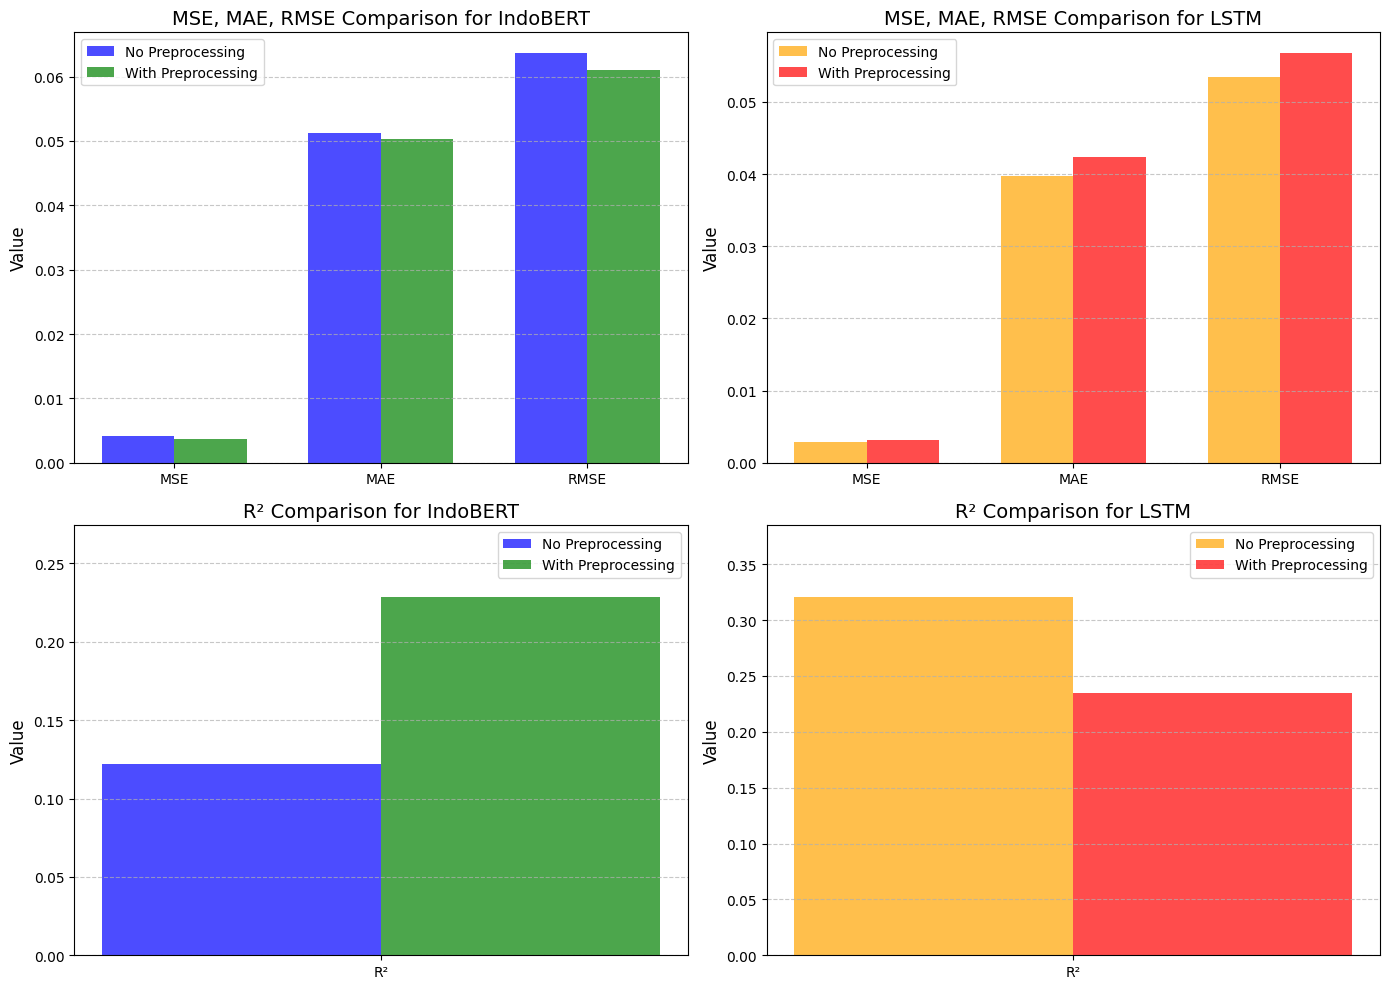

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data yang disesuaikan
metrics = ['MSE', 'MAE', 'RMSE']
x = np.arange(len(metrics))  # Indeks untuk MSE, MAE, RMSE
width = 0.35  # Lebar bar

# Data untuk IndoBERT dan LSTM
indobert_no_pre = [0.0041, 0.0512, 0.0637, 0.1218]  # MSE, MAE, RMSE, R2
indobert_pre = [0.0037, 0.0503, 0.0610, 0.2288]
lstm_no_pre = [0.0029, 0.0398, 0.0535, 0.3210]
lstm_pre = [0.0032, 0.0424, 0.0568, 0.2343]

# Membuat figure dan axes
fig, ax = plt.subplots(2, 2, figsize=(14, 10))  # 2 baris, 2 kolom

# Subplot 1: MSE, MAE, RMSE untuk IndoBERT
ax[0, 0].bar(x - width / 2, indobert_no_pre[:3], width, label='No Preprocessing', color='blue', alpha=0.7)
ax[0, 0].bar(x + width / 2, indobert_pre[:3], width, label='With Preprocessing', color='green', alpha=0.7)
ax[0, 0].set_title('MSE, MAE, RMSE Comparison for IndoBERT', fontsize=14)
ax[0, 0].set_ylabel('Value', fontsize=12)
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(metrics, fontsize=10)
ax[0, 0].legend()
ax[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: MSE, MAE, RMSE untuk LSTM
ax[0, 1].bar(x - width / 2, lstm_no_pre[:3], width, label='No Preprocessing', color='orange', alpha=0.7)
ax[0, 1].bar(x + width / 2, lstm_pre[:3], width, label='With Preprocessing', color='red', alpha=0.7)
ax[0, 1].set_title('MSE, MAE, RMSE Comparison for LSTM', fontsize=14)
ax[0, 1].set_ylabel('Value', fontsize=12)
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(metrics, fontsize=10)
ax[0, 1].legend()
ax[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 3: R² untuk IndoBERT
x = np.arange(1)  # Hanya ada 1 kategori untuk R²
ax[1, 0].bar(x - width/2, [indobert_no_pre[3]], width, color='blue', alpha=0.7, label='No Preprocessing')
ax[1, 0].bar(x + width/2, [indobert_pre[3]], width, color='green', alpha=0.7, label='With Preprocessing')
ax[1, 0].set_title('R² Comparison for IndoBERT', fontsize=14)
ax[1, 0].set_ylabel('Value', fontsize=12)
ax[1, 0].set_xticks(x)  # Menempatkan kategori di tengah
ax[1, 0].set_xticklabels(['R²'])  # Label untuk sumbu X
ax[1, 0].set_ylim(0, max(indobert_no_pre[3], indobert_pre[3]) * 1.2)
ax[1, 0].legend()
ax[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 4: R² untuk LSTM
ax[1, 1].bar(x - width/2, [lstm_no_pre[3]], width, color='orange', alpha=0.7, label='No Preprocessing')
ax[1, 1].bar(x + width/2, [lstm_pre[3]], width, color='red', alpha=0.7, label='With Preprocessing')
ax[1, 1].set_title('R² Comparison for LSTM', fontsize=14)
ax[1, 1].set_ylabel('Value', fontsize=12)
ax[1, 1].set_xticks(x)  # Menempatkan kategori di tengah
ax[1, 1].set_xticklabels(['R²'])  # Label untuk sumbu X
ax[1, 1].set_ylim(0, max(lstm_no_pre[3], lstm_pre[3]) * 1.2)
ax[1, 1].legend()
ax[1, 1].grid(axis='y', linestyle='--', alpha=0.7)


# Adjust layout
plt.tight_layout()
plt.show()
